In [7]:
#ders 3 tekrarıdır

import numpy as np
import matplotlib.pyplot as  plt
import torch


In [8]:
x=np.arange(11)-5
a=1
y=a*x**2+x #gerçek

In [12]:
print(x)
print(a)
print(y)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
1
[20 12  6  2  0  0  2  6 12 20 30]


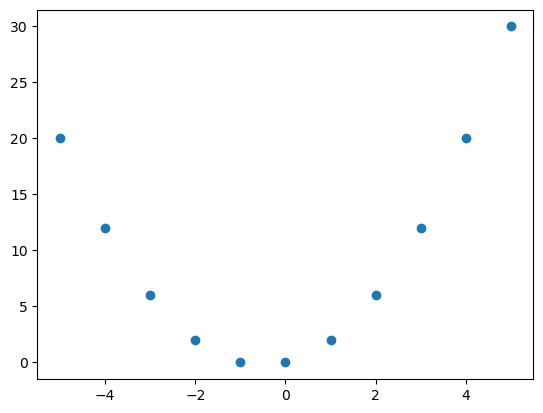

In [13]:
plt.scatter(x,y)
plt.show()

In [14]:
def mse(y_gercek,y_tahmin):
    hata=np.mean((y_gercek-y_tahmin)**2)
    return hata


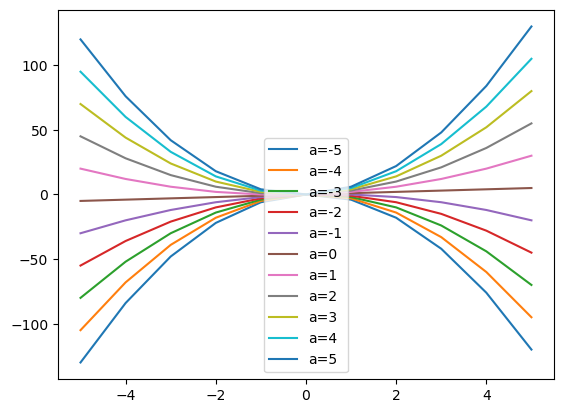

In [16]:
hata_listesi=[]
for a in np.arange(11)-5:
    y_hat=a*x**2+x    #tahmin
    plt.plot(x,y_hat,label=f"a={a}")
    model_hatasi=mse(y,y_hat)
    hata_listesi.append(model_hatasi)
plt.legend()
plt.plot()
plt.show()

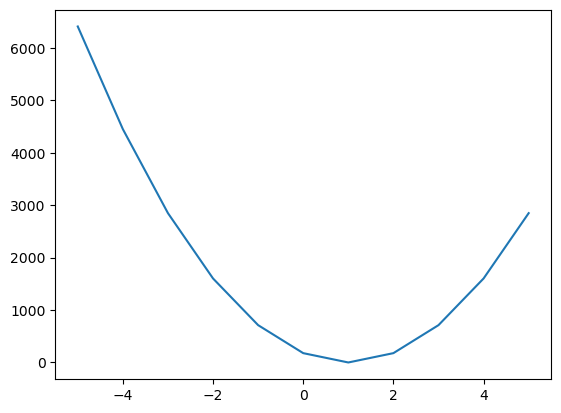

In [17]:
plt.plot(np.arange(11)-5,hata_listesi)
plt.show()

In [19]:
#------------------------------------------2-----------------------------------------------#

In [20]:
# 2 sinyalim var birbirine benzeticez
import numpy as np
import matplotlib.pyplot as  plt
import torch

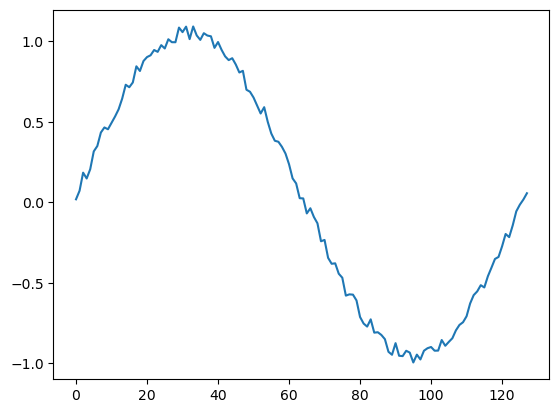

In [27]:
#orijinal sinyali oluşturmak için zamana ihtiyacımız var1
#128 değer olacak şekilde zaman serisi oluşturduk
t=np.linspace(0,2*np.pi,128) 
sinyal=np.sin(t) + np.random.random((128,))*0.1
plt.plot(sinyal)
plt.show()

#np.random.random((128,))*0.1 bu kısım tırtıklı tırtıklı yaptı

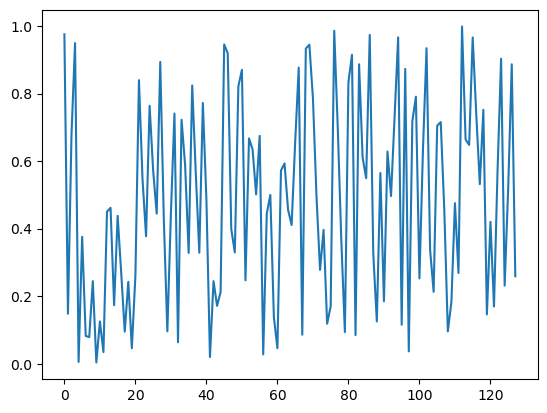

In [28]:
degisken_sinyal=np.random.random((128,))
plt.plot(degisken_sinyal)
plt.show()

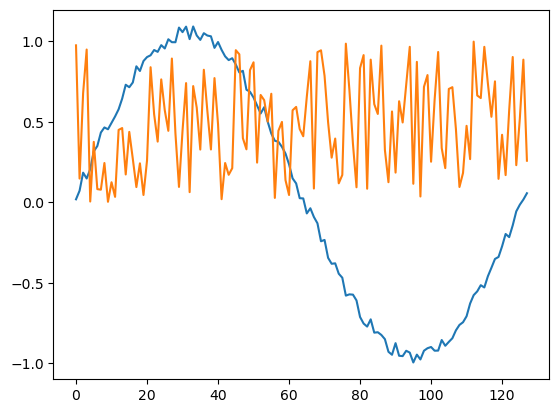

In [29]:
plt.plot(sinyal)
plt.plot(degisken_sinyal)
plt.show()


In [30]:
hedef_tensor=torch.from_numpy(sinyal)
degisken_tensor=torch.from_numpy(degisken_sinyal)

In [31]:
hedef_tensor_variable=torch.autograd.Variable(hedef_tensor,requires_grad=False)
degisken_tensor_variable=torch.autograd.Variable(degisken_tensor,requires_grad=True)
#requires_grad=False -- SABİT OLARAK TUT DEMEK

In [34]:
optimizer=torch.optim.Adam([degisken_tensor_variable],lr=0.1)
#buradaki lr pdf teki gradyan azalma nedir kısmındali lr 1 verirsek 3 . şekil olur hızına bağlıdır


In [35]:
#loss fonksiyonu
loss_fn=torch.nn.MSELoss()

In [42]:
update=0
total_update=100

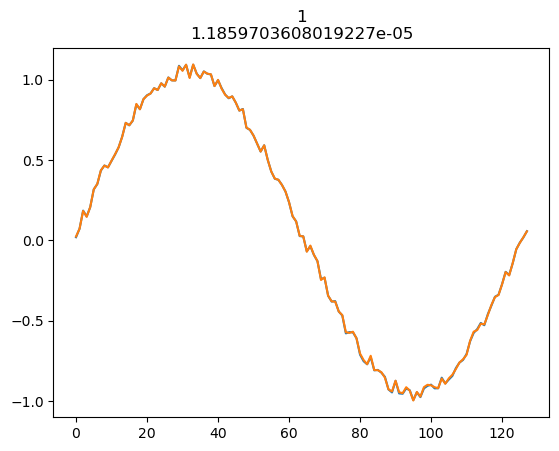

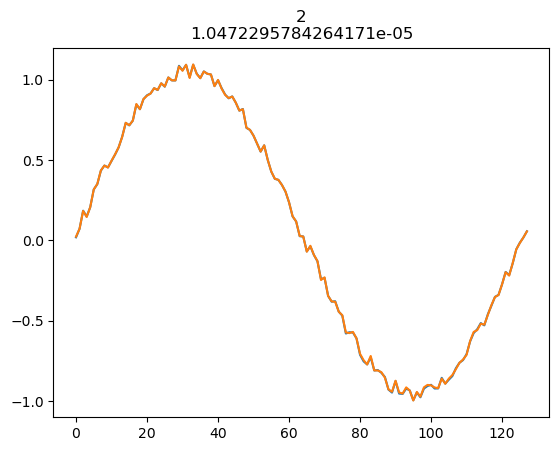

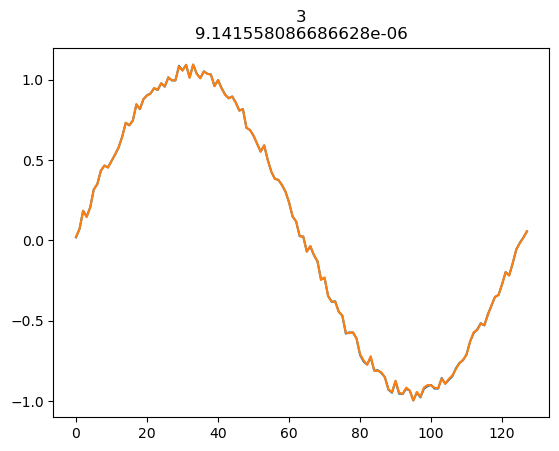

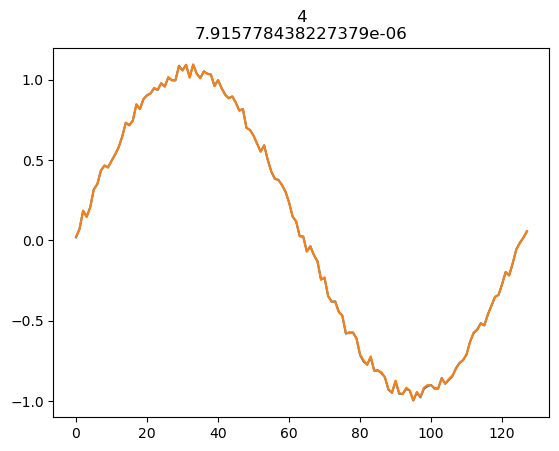

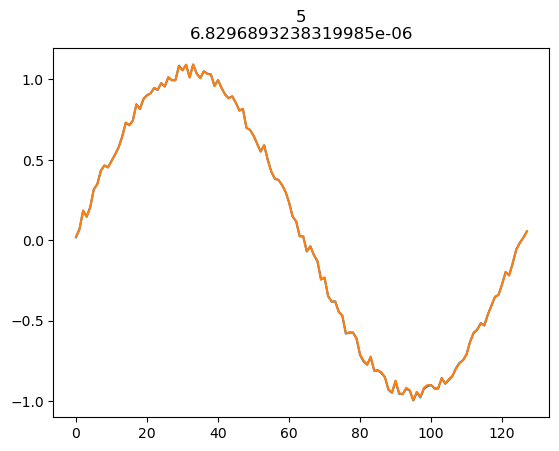

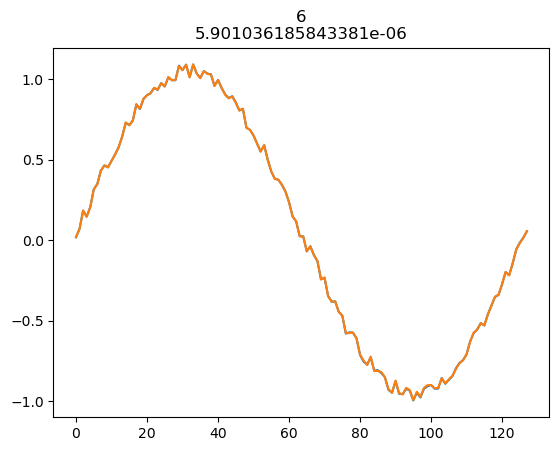

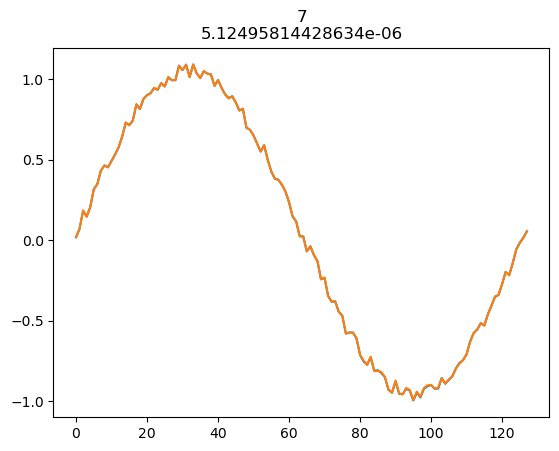

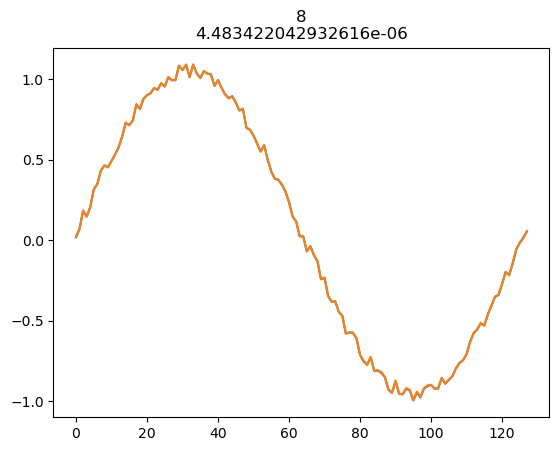

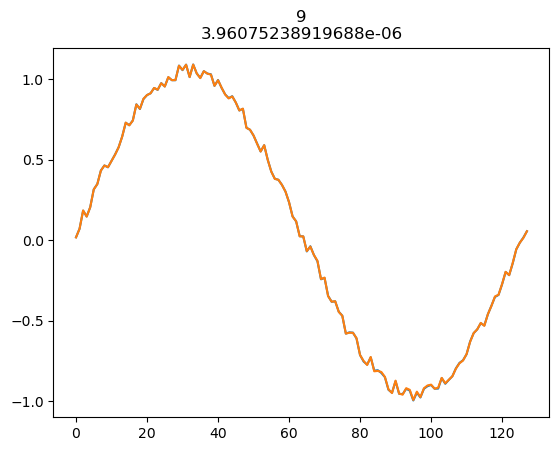

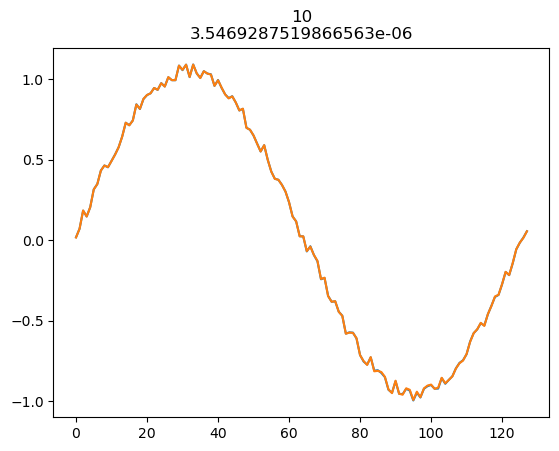

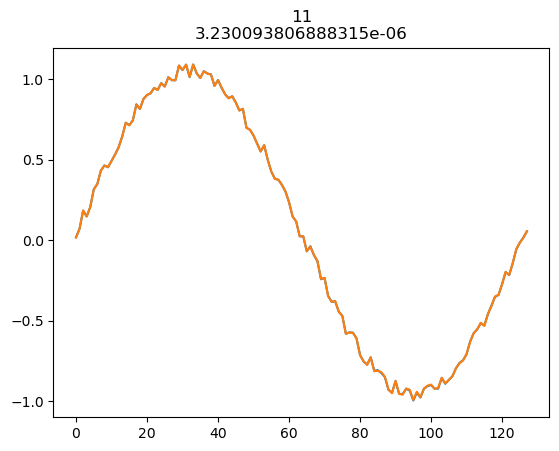

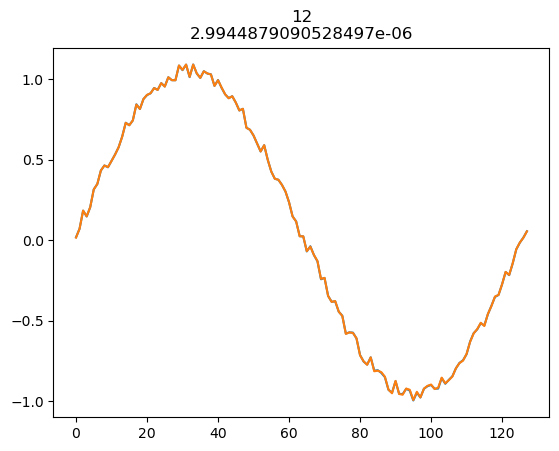

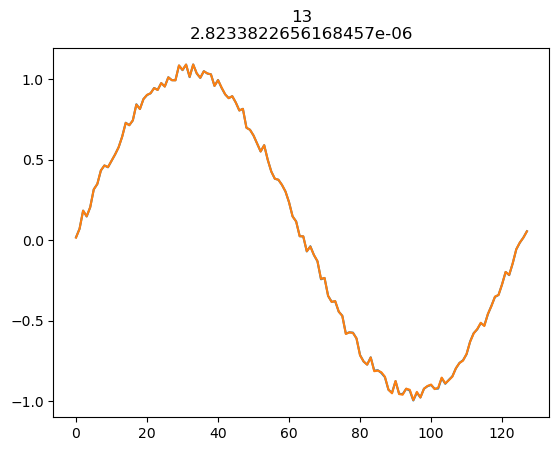

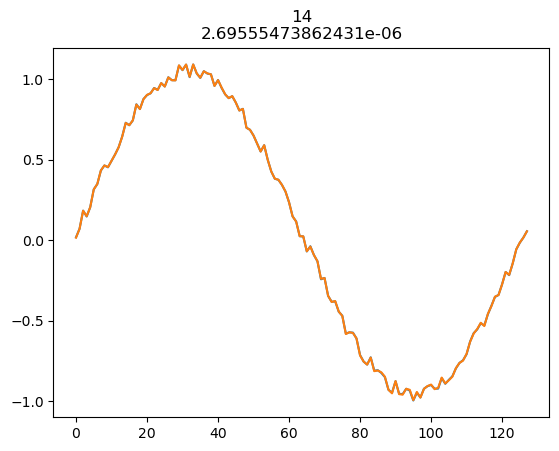

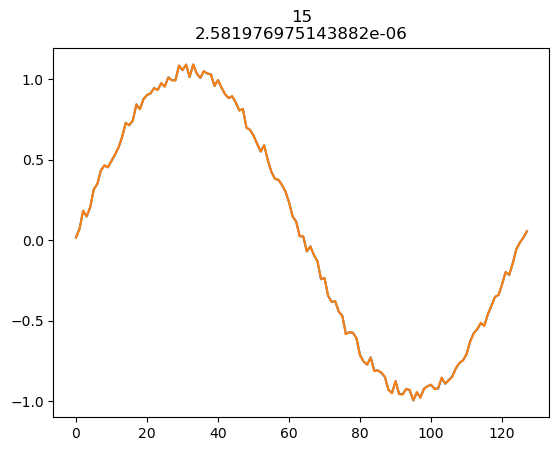

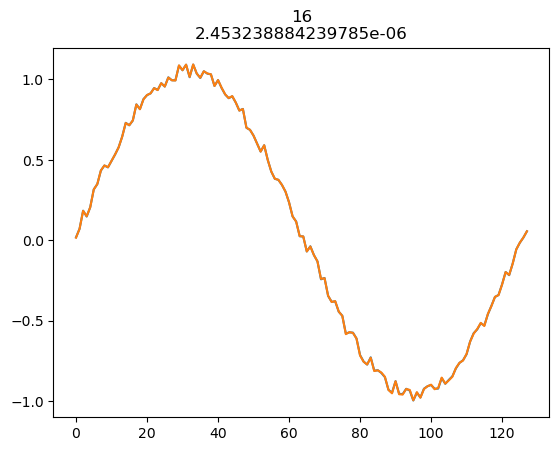

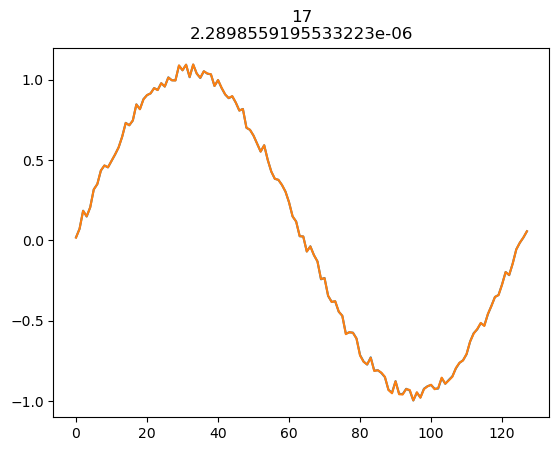

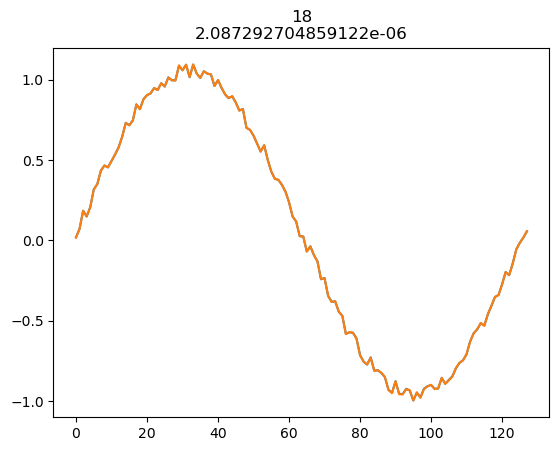

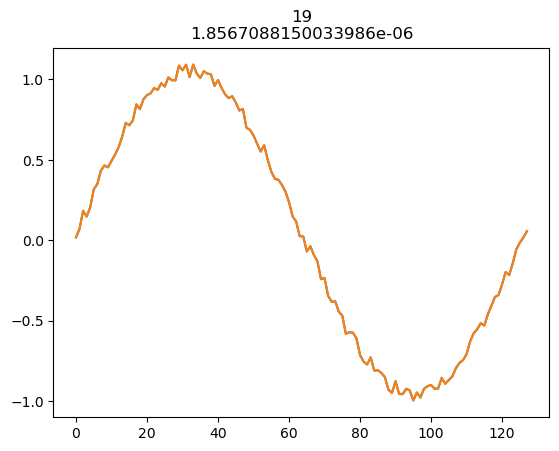

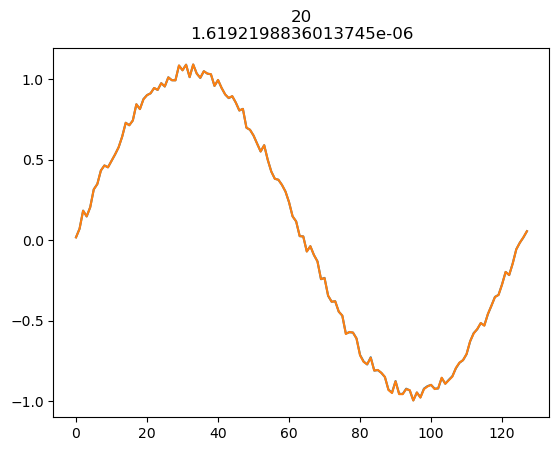

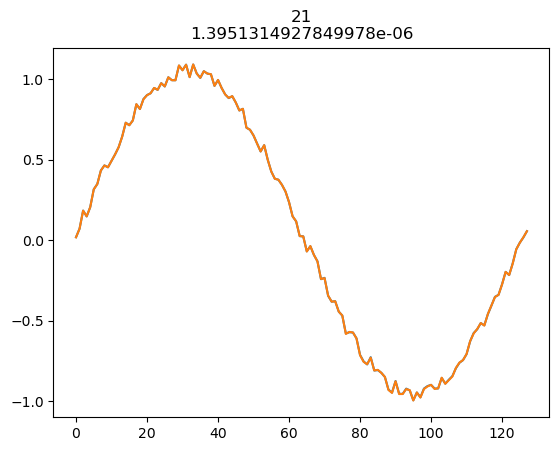

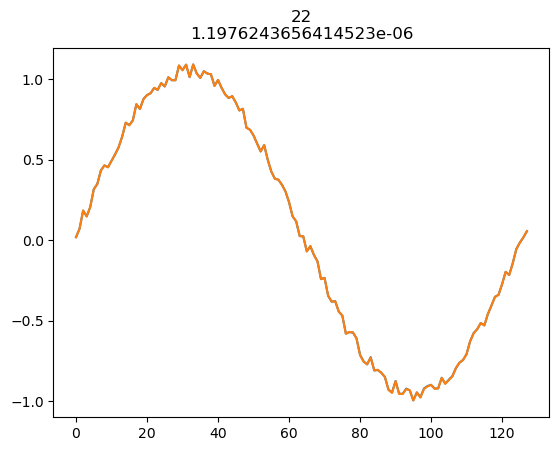

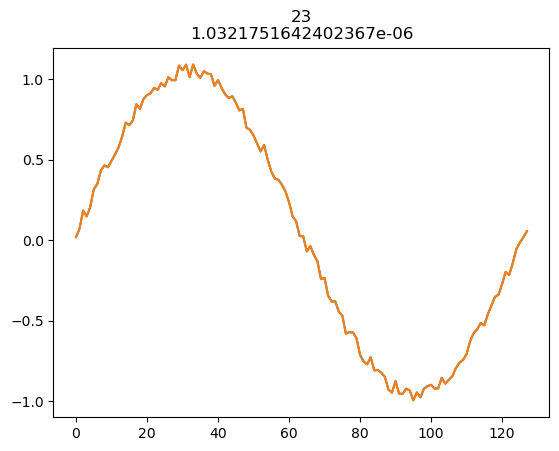

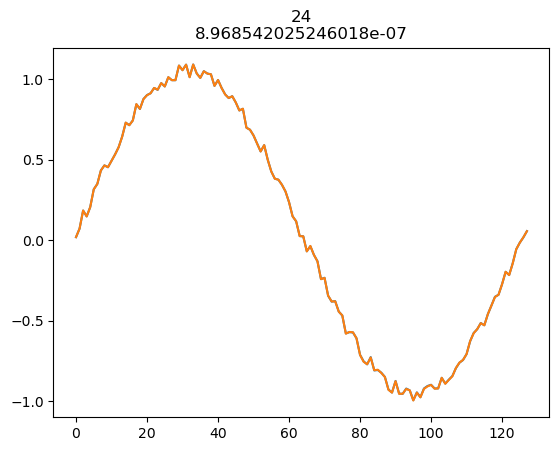

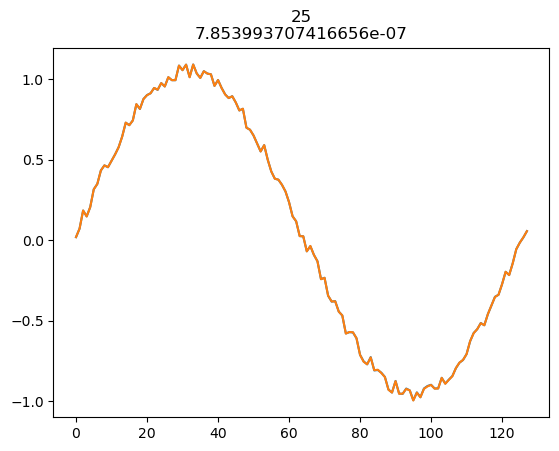

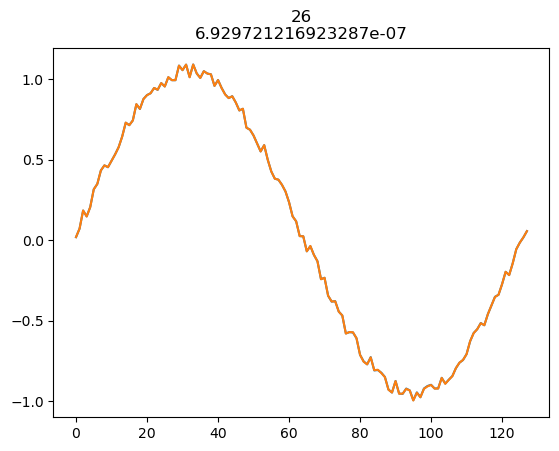

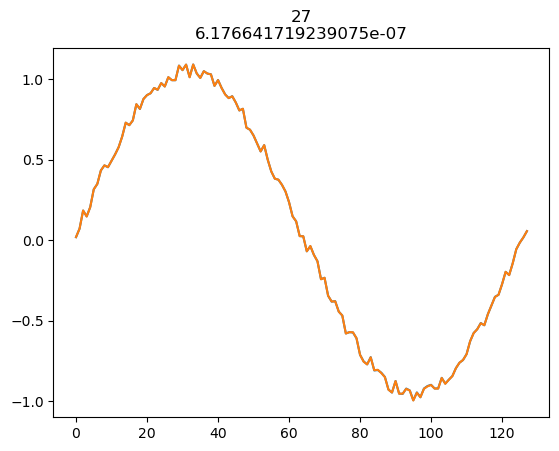

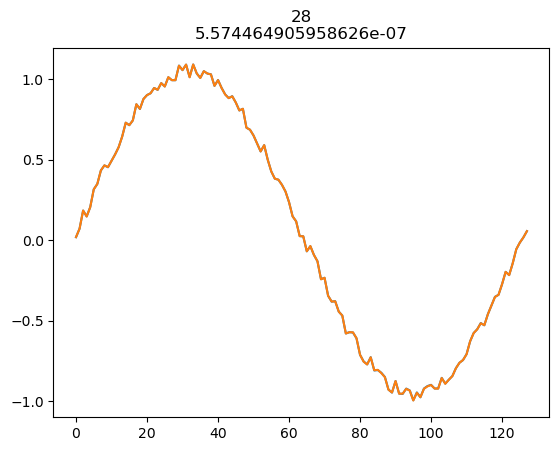

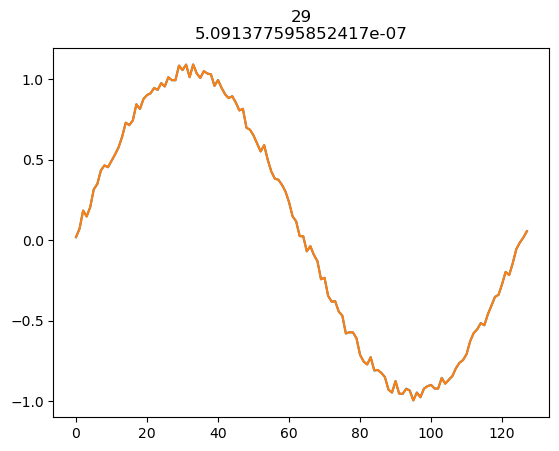

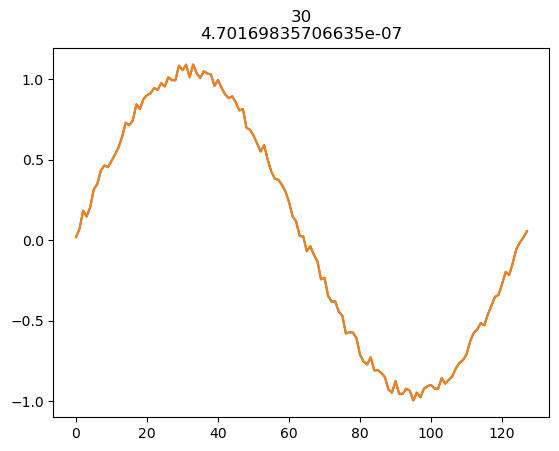

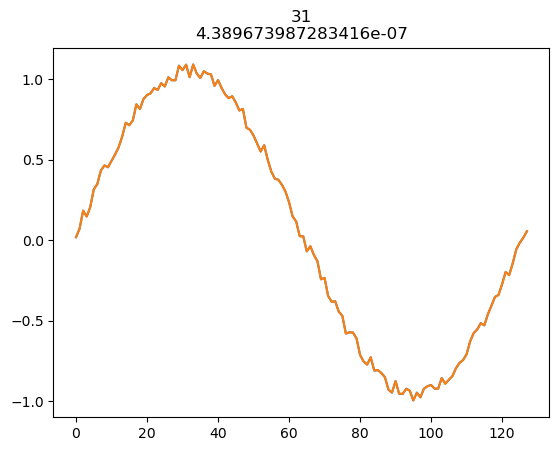

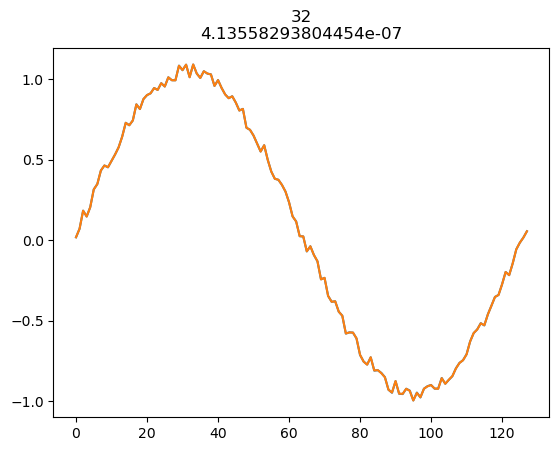

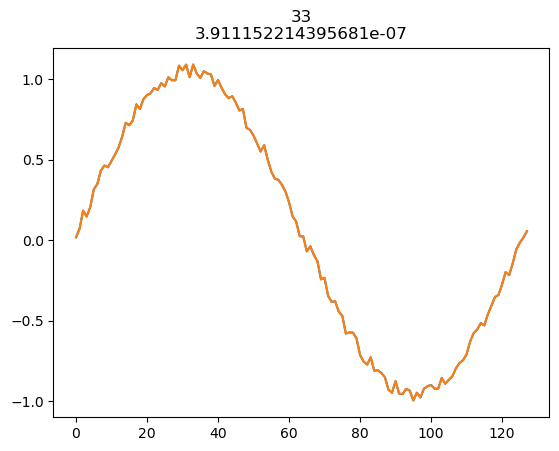

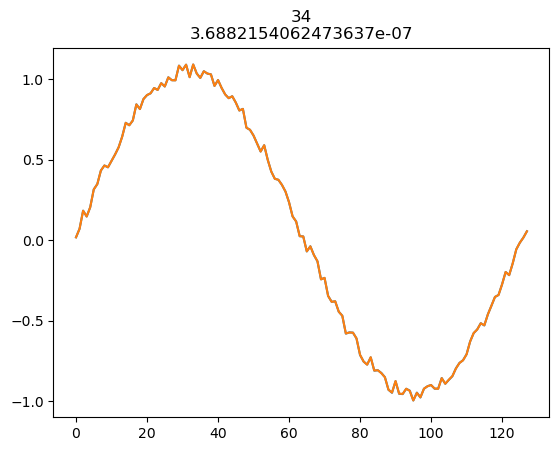

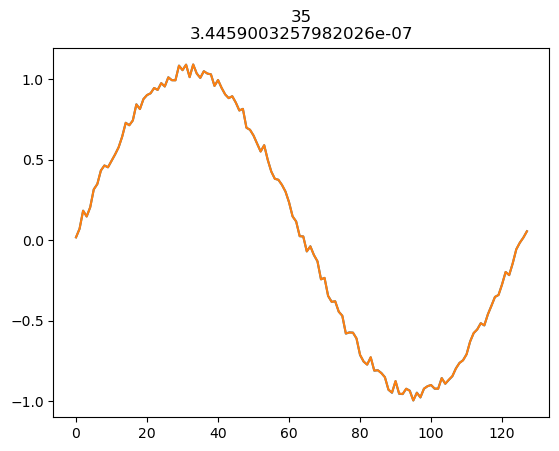

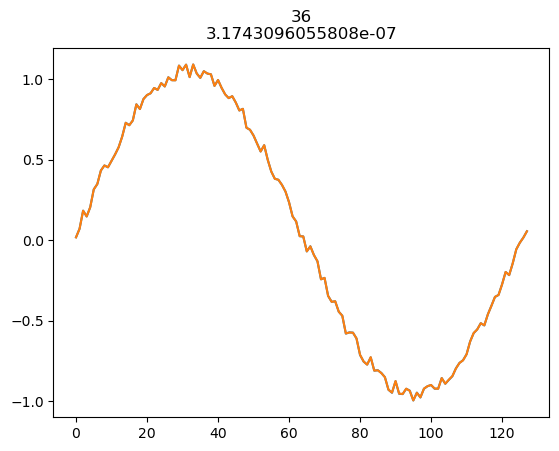

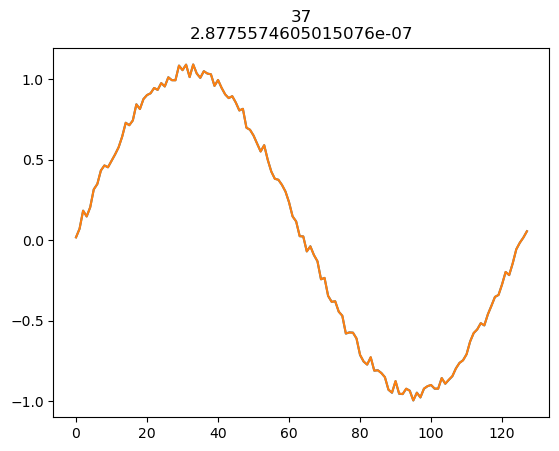

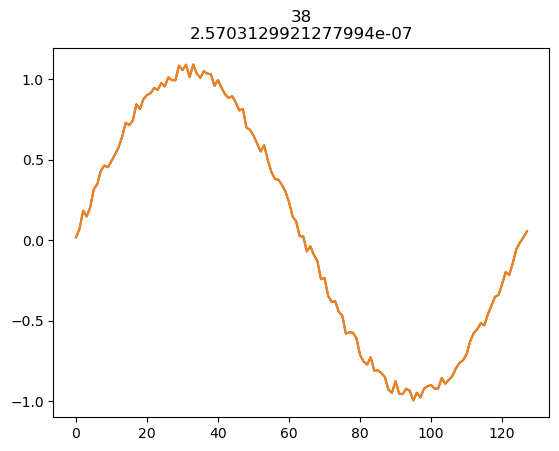

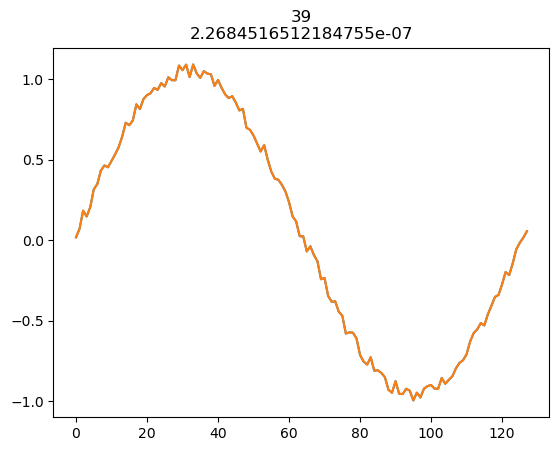

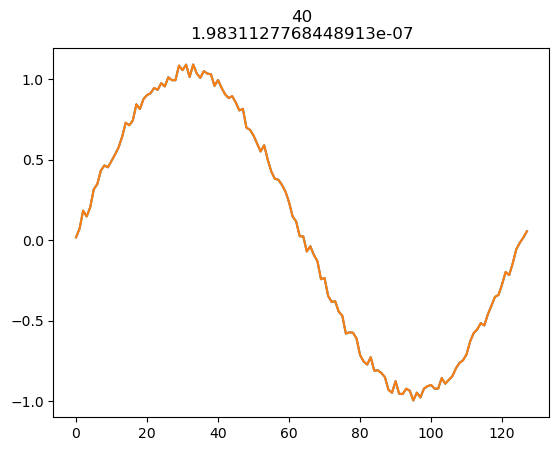

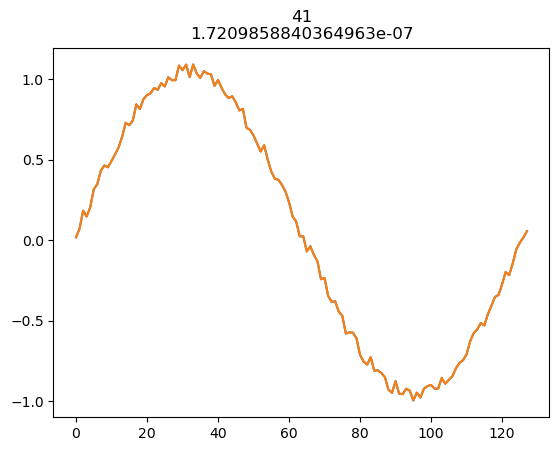

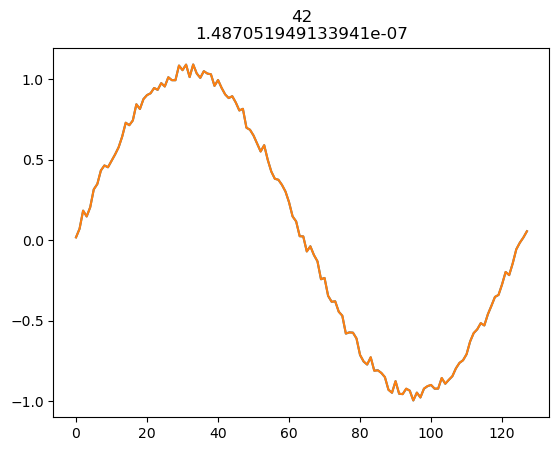

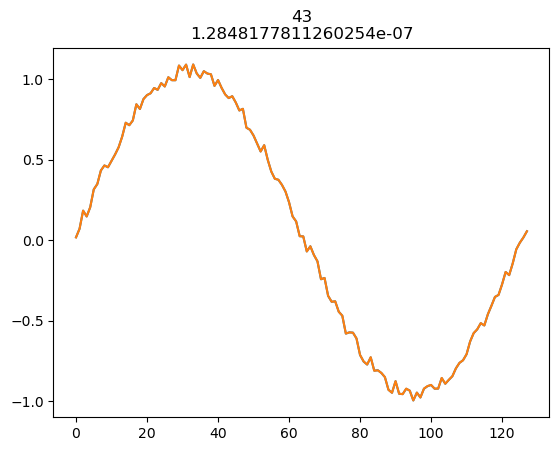

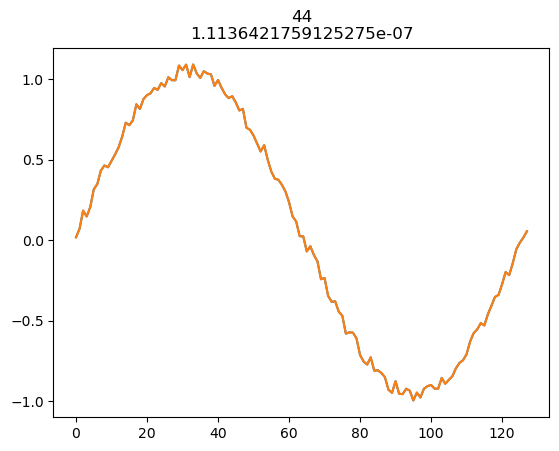

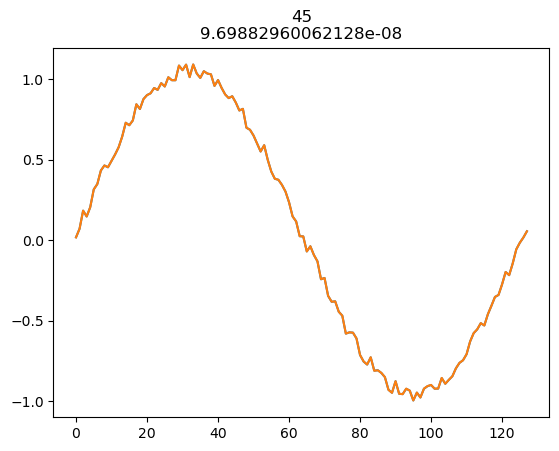

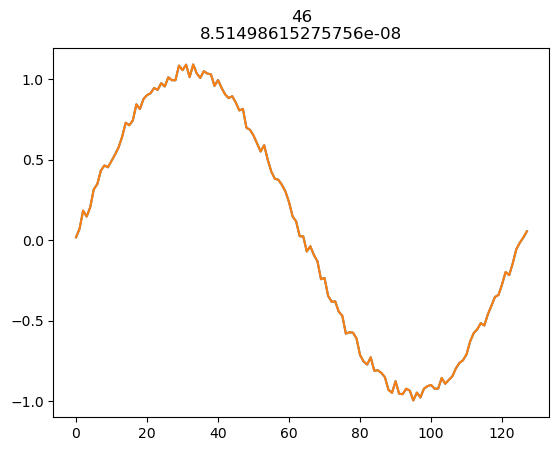

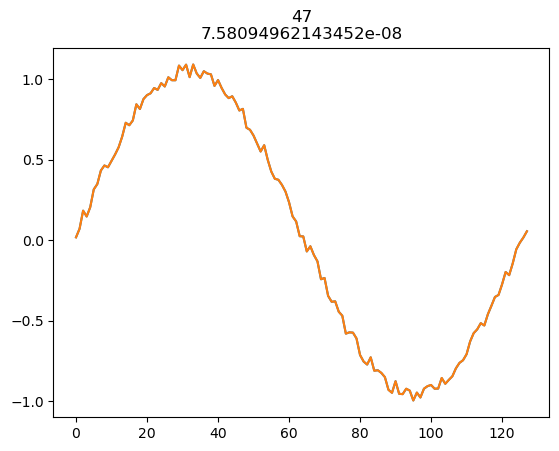

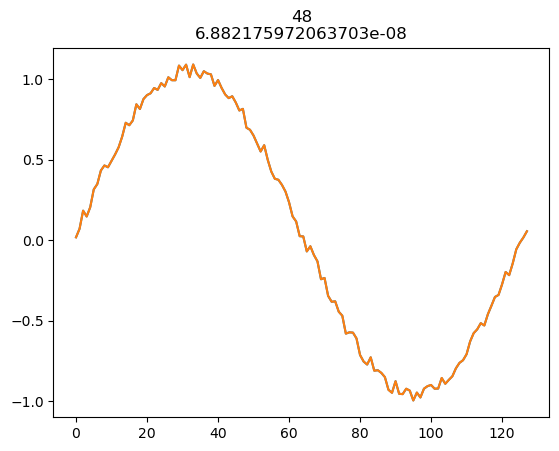

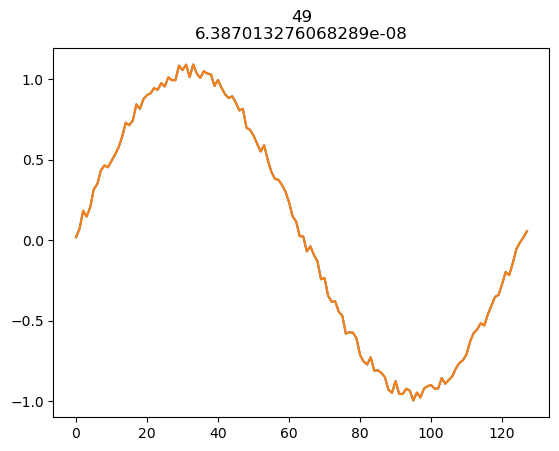

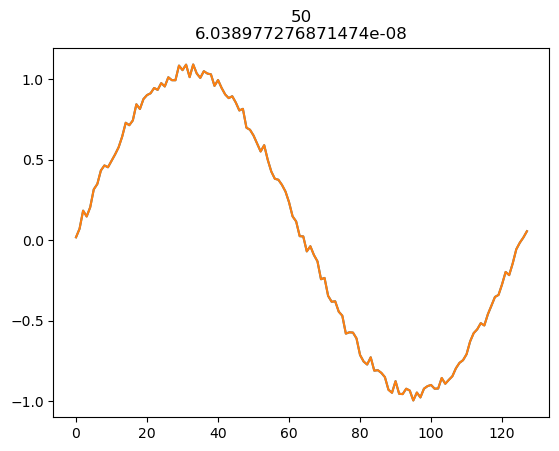

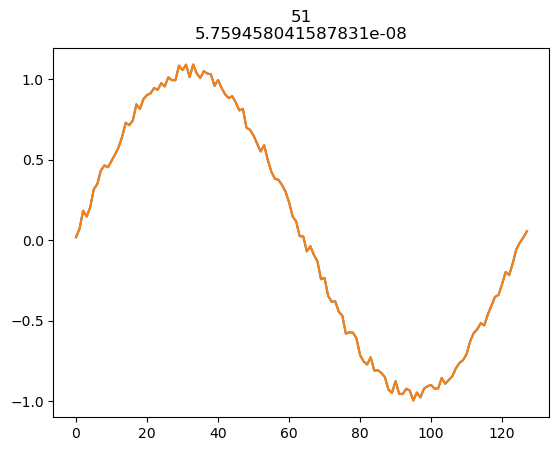

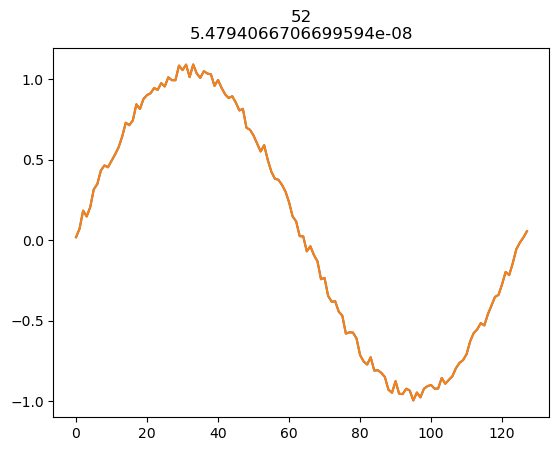

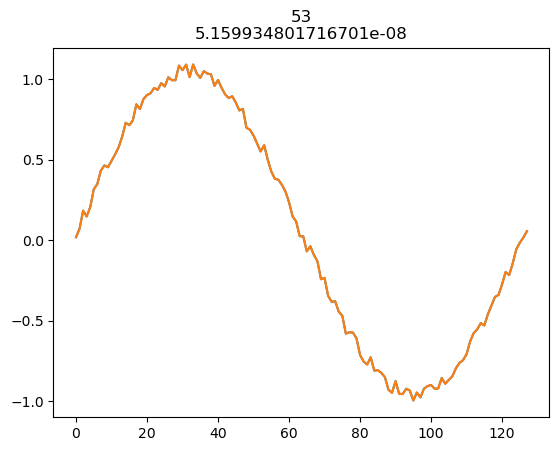

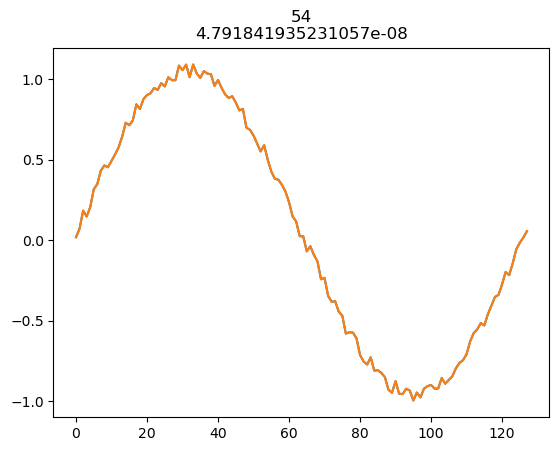

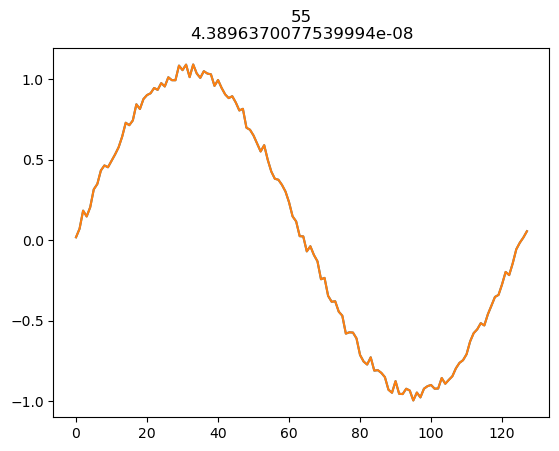

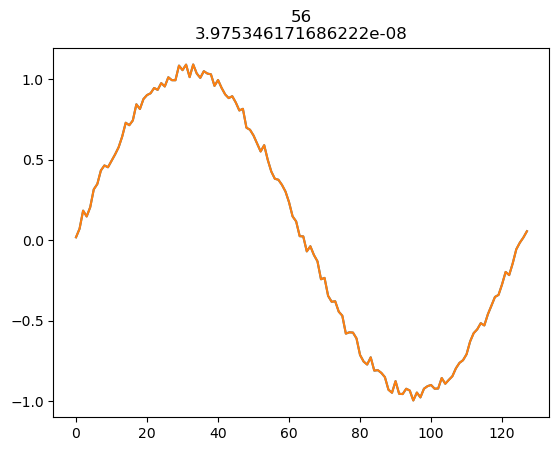

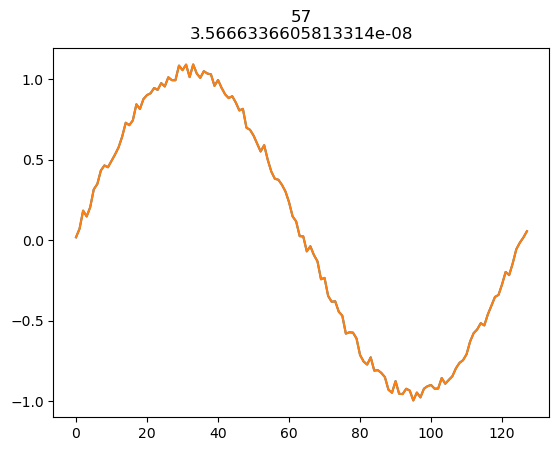

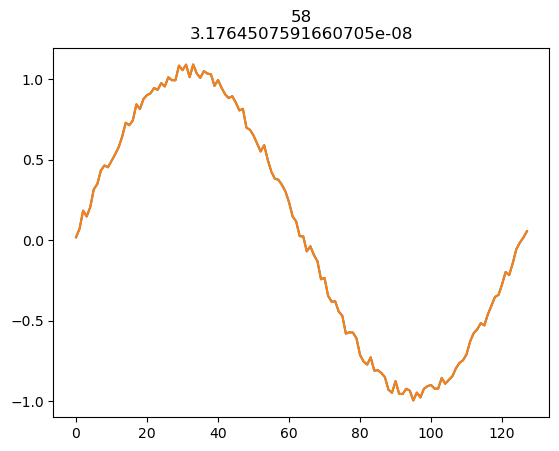

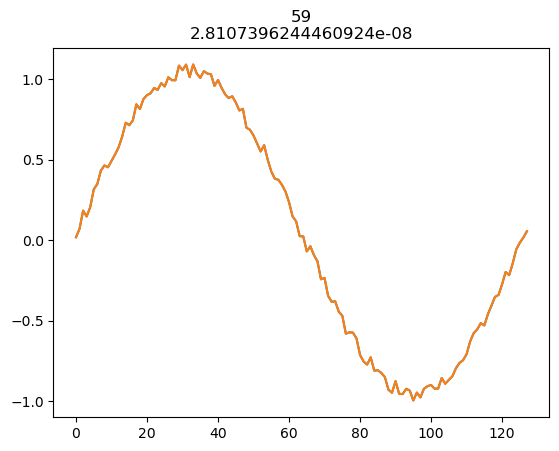

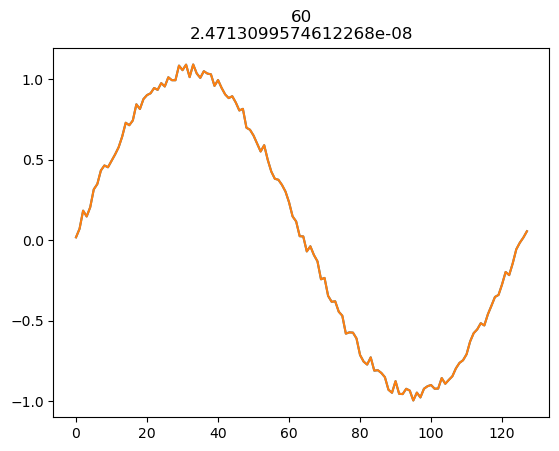

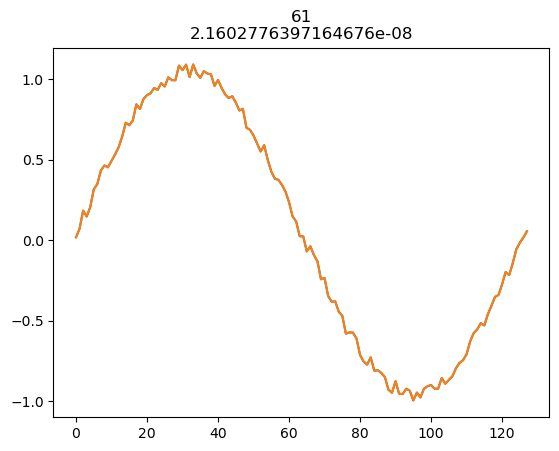

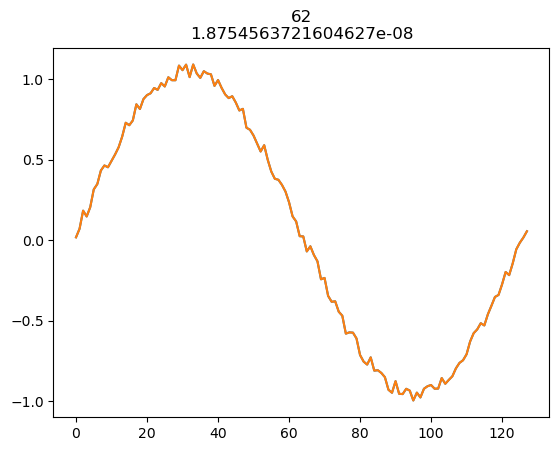

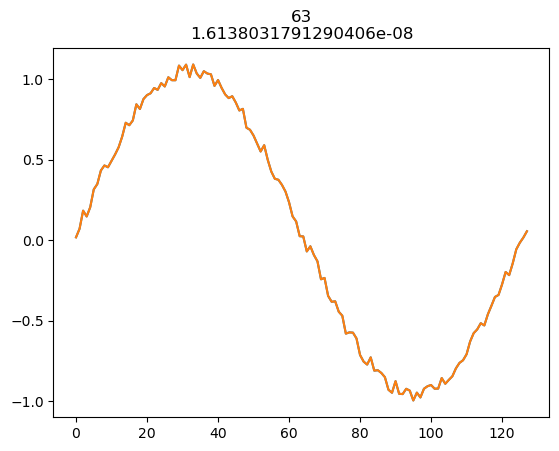

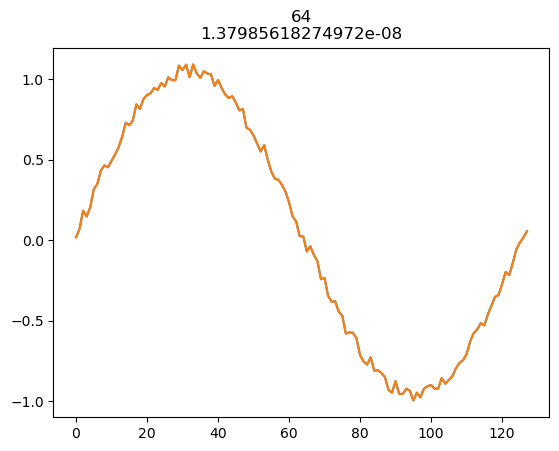

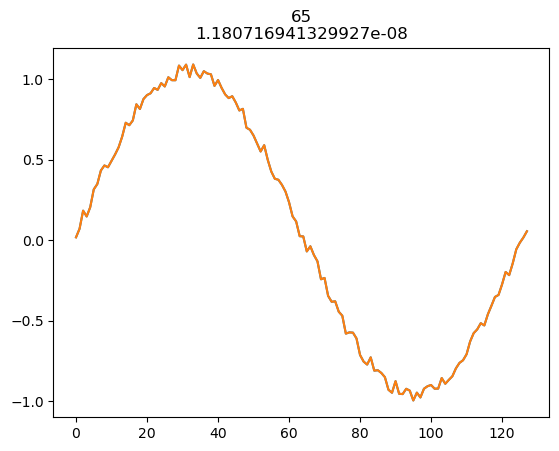

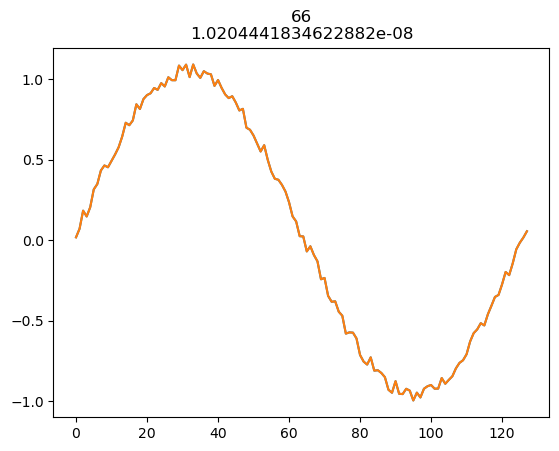

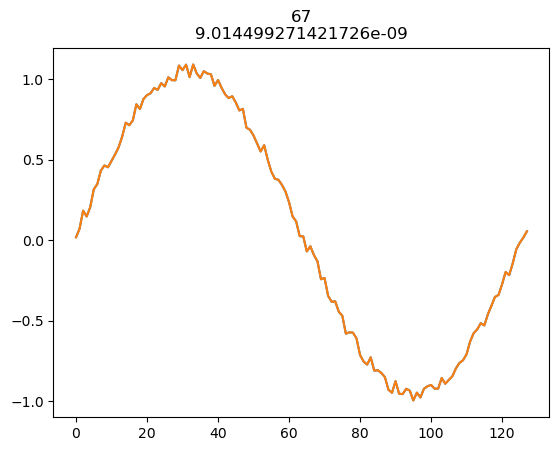

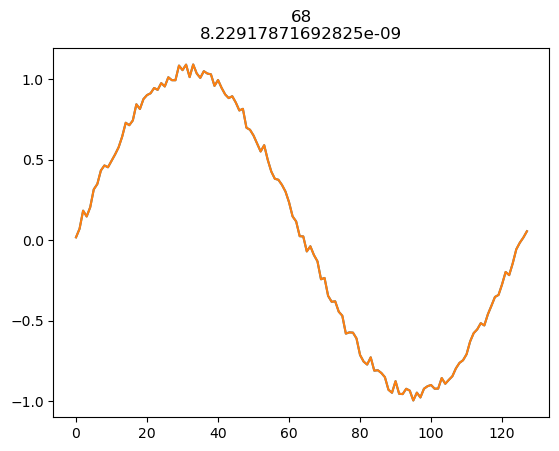

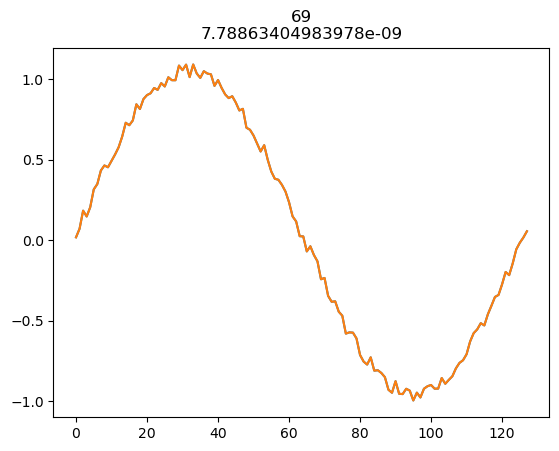

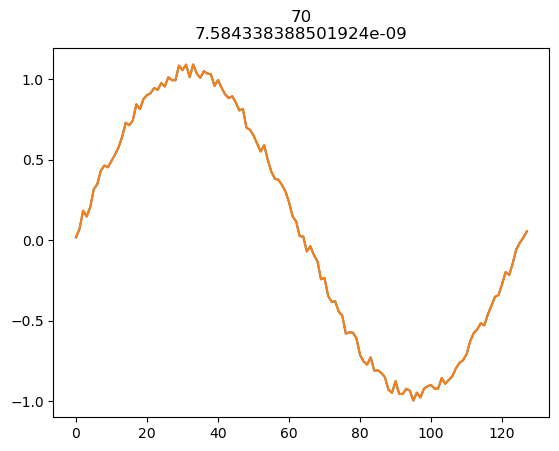

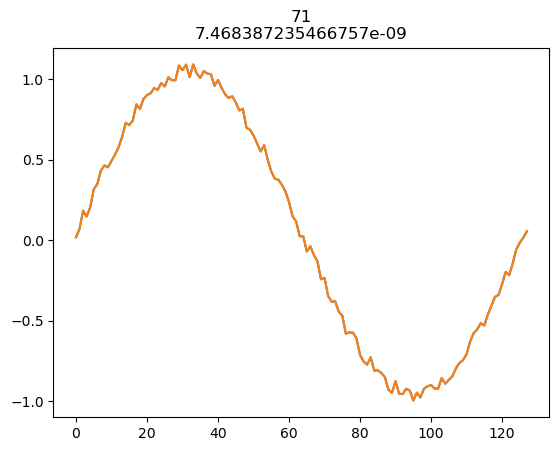

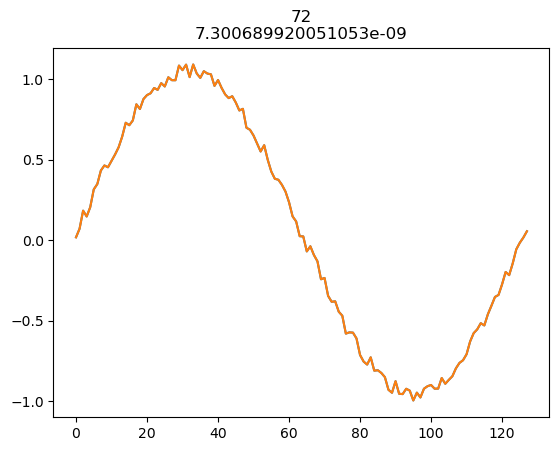

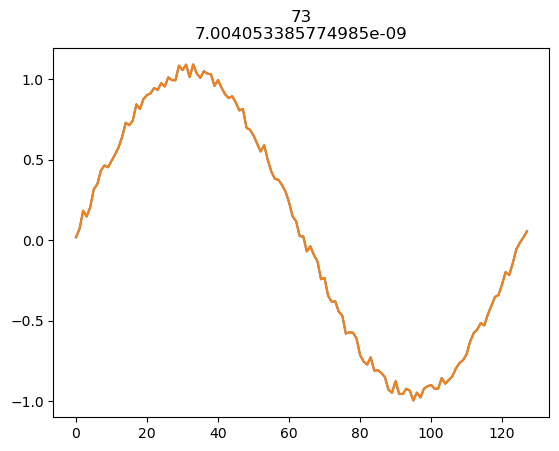

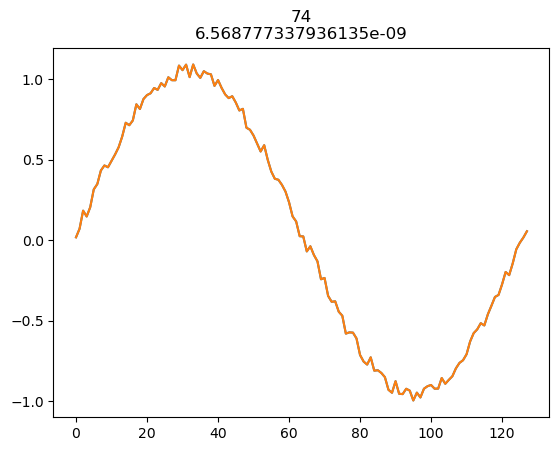

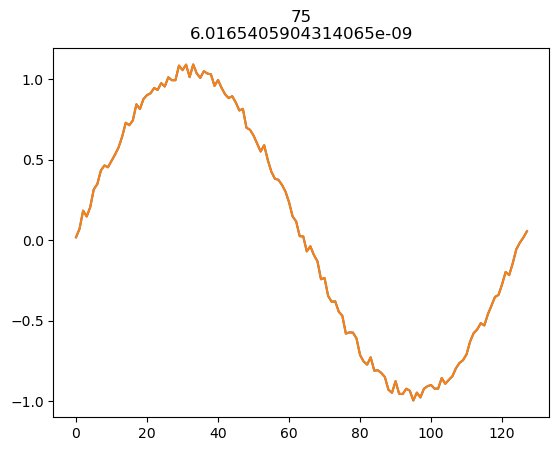

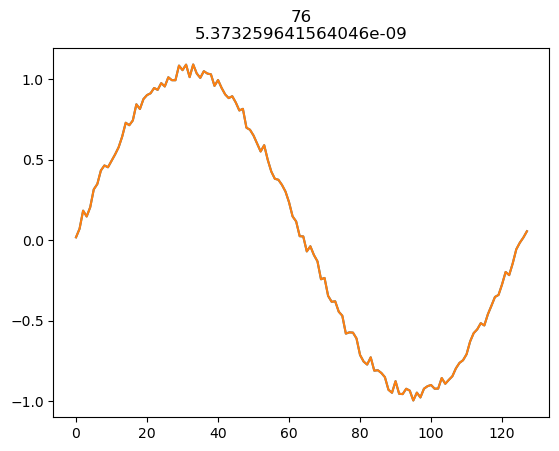

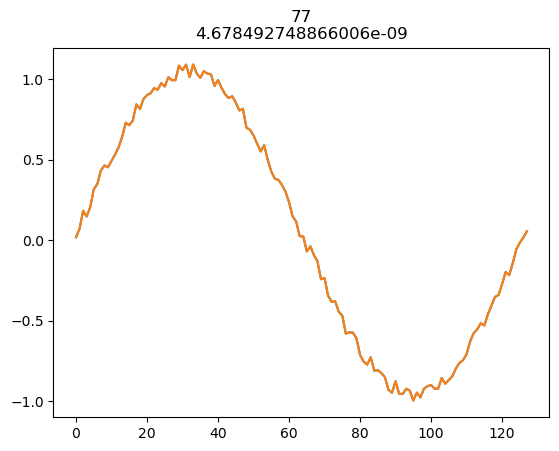

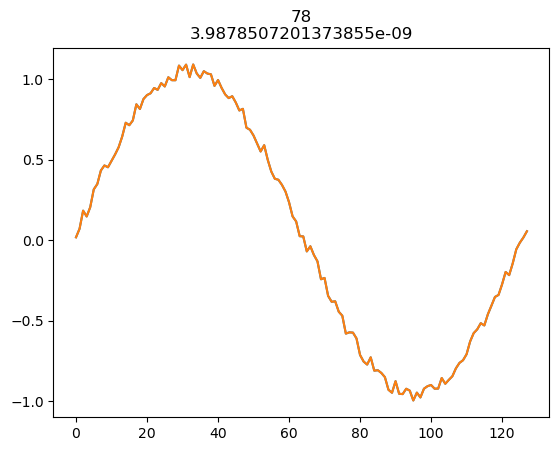

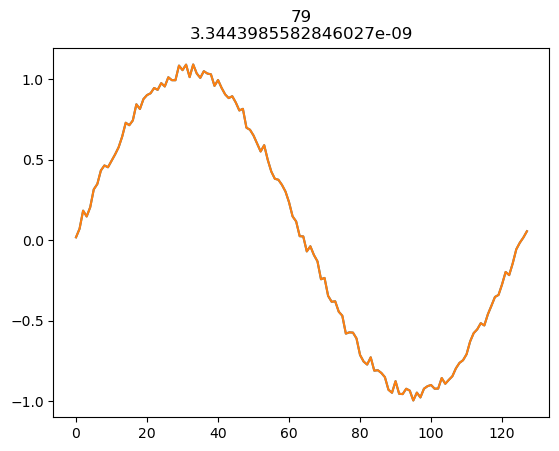

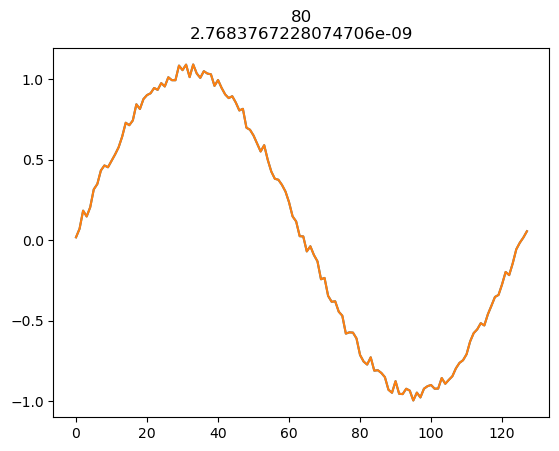

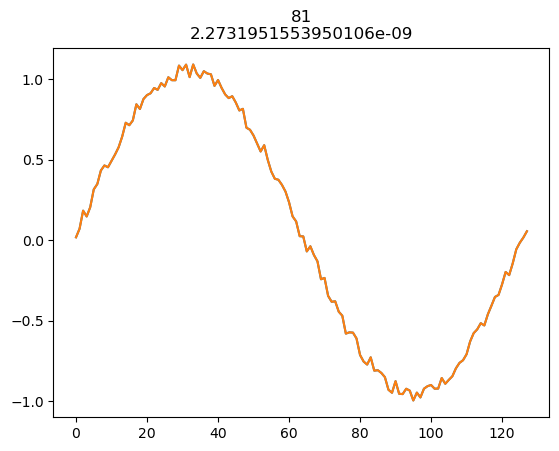

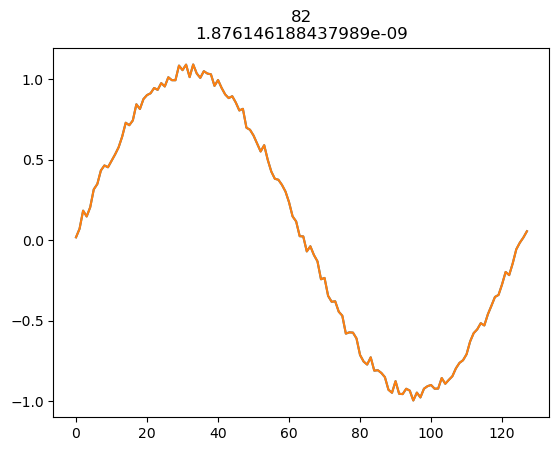

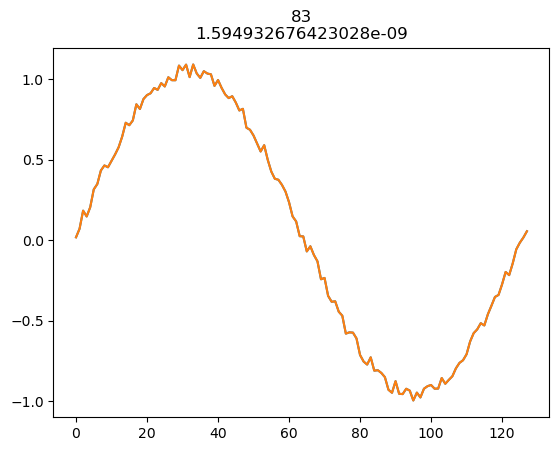

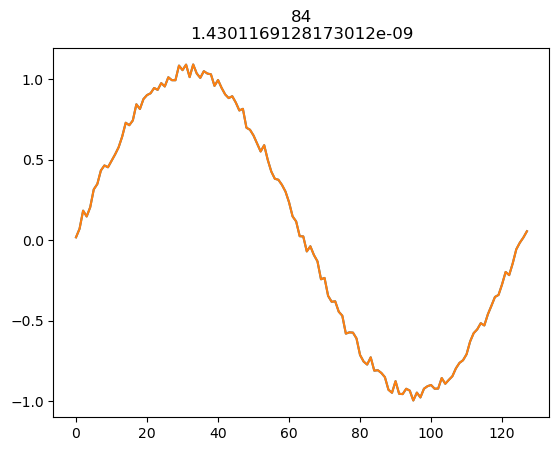

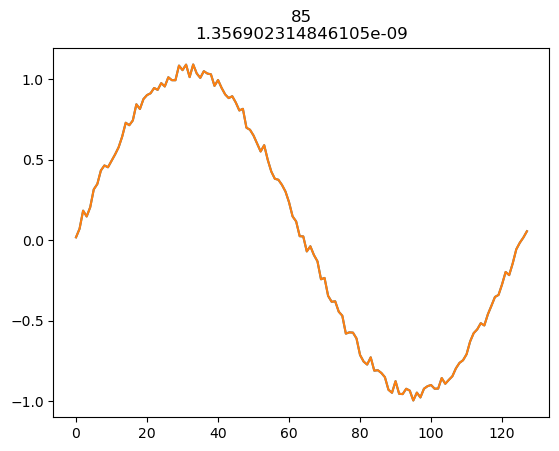

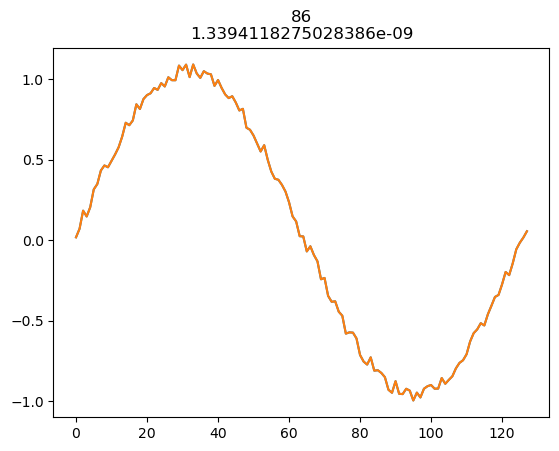

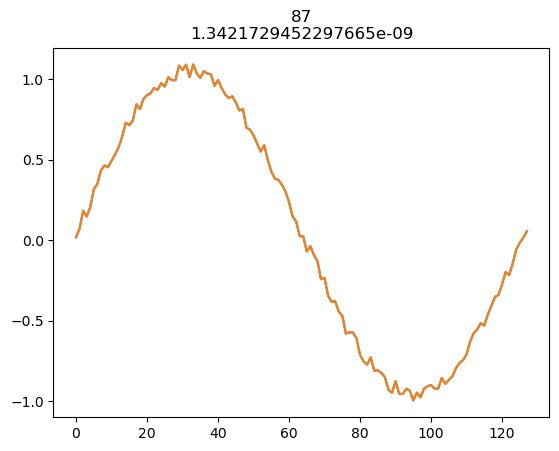

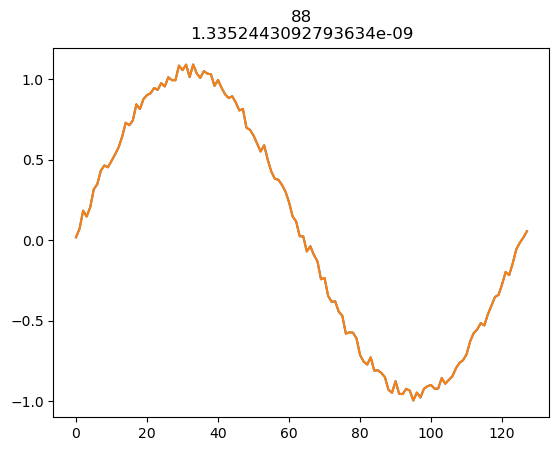

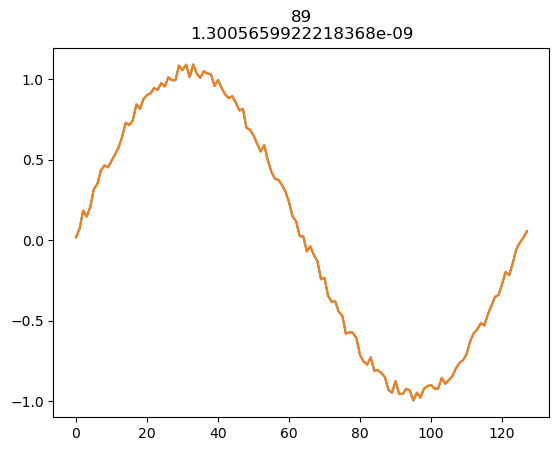

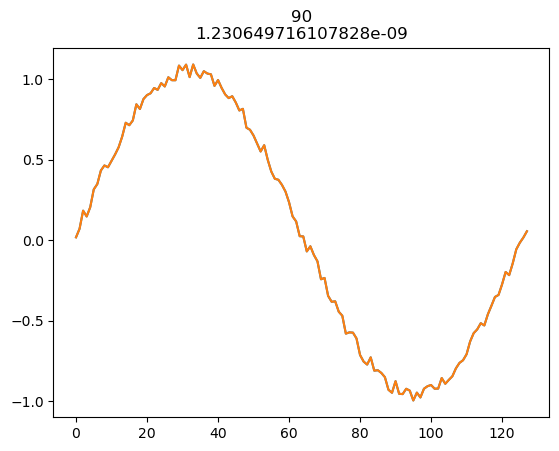

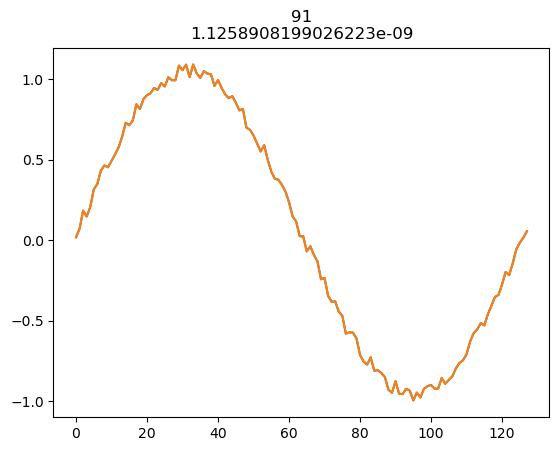

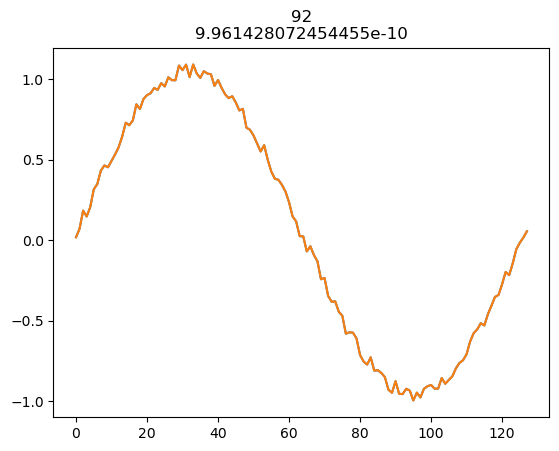

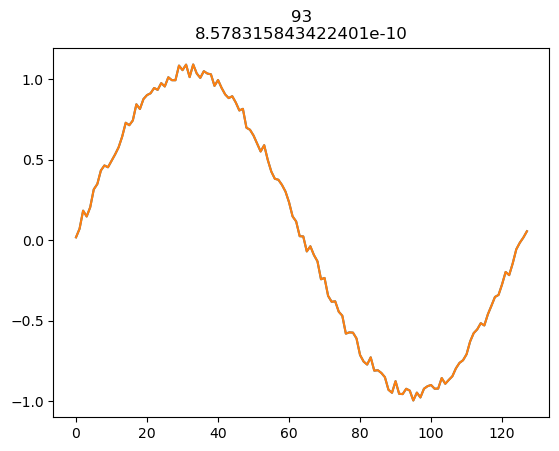

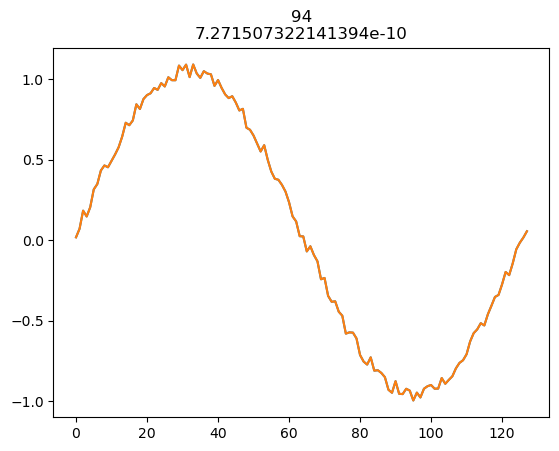

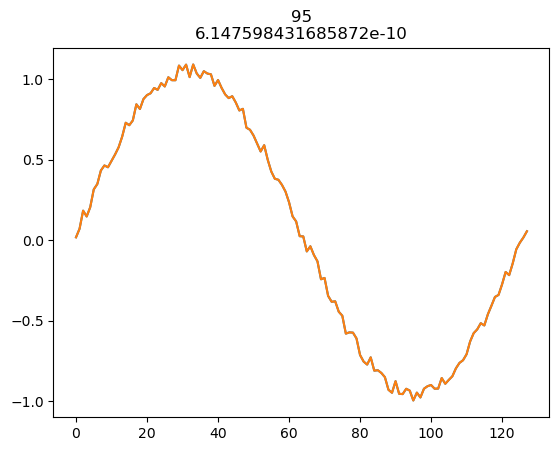

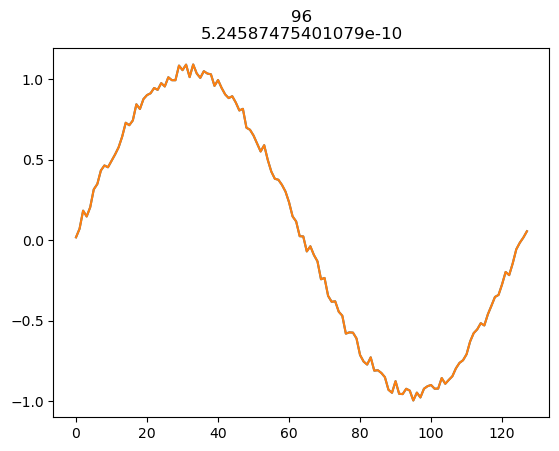

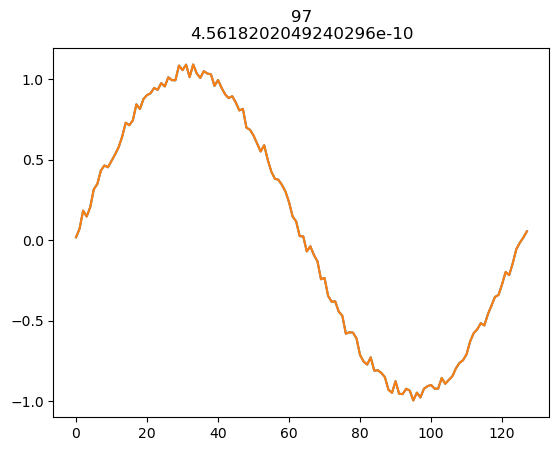

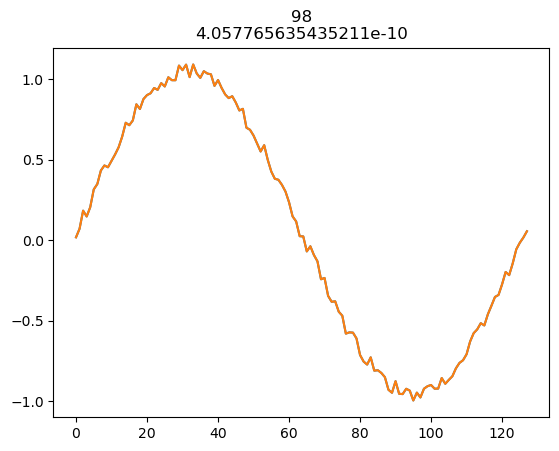

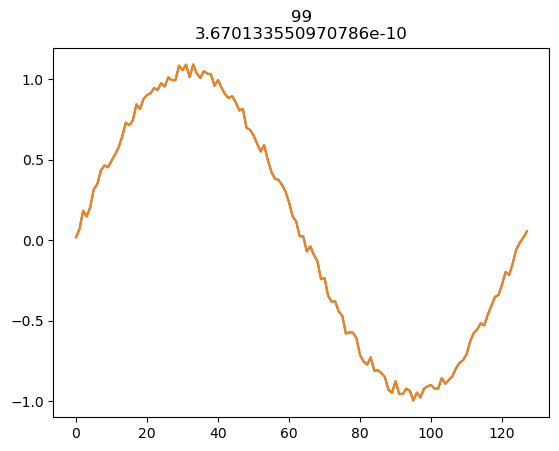

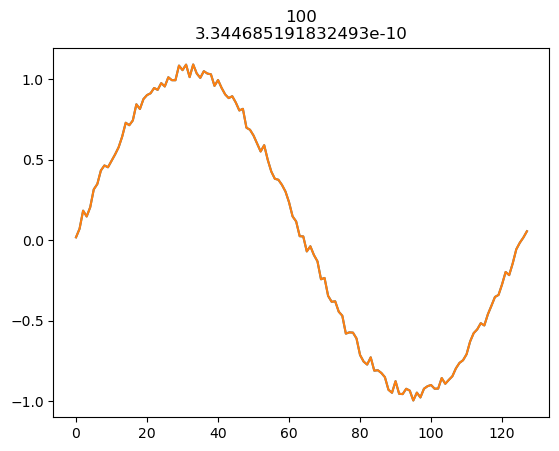

In [43]:
while update<total_update:
    
    optimizer.zero_grad()
    
    loss=loss_fn(hedef_tensor_variable,degisken_tensor_variable) #mavi ve turuncu arasındaki losu bul 
    
    loss.backward()
    
    optimizer.step()
    
    update=update+1
    
    plt.clf()
    
    plt.plot(hedef_tensor_variable.detach().numpy())
    plt.plot(degisken_tensor_variable.detach().numpy())
  #detach variable özelliğinden çıkarır ekranda çıkarmak için
  
    plt.title(f"{update}\n{loss}")
    plt.show()
    plt.pause(0.1)

In [44]:
#------------------------------------------------------------3--------------------------------------------

In [49]:
import numpy as np
import matplotlib.pyplot as  plt
import torch

In [52]:
np.random.seed(0)
x=np.random.randint(-10,10,size=10)  #-10 ile 10 arasında toplamda 10 tane sayı 

y=-5* x**2 + 3*x +25

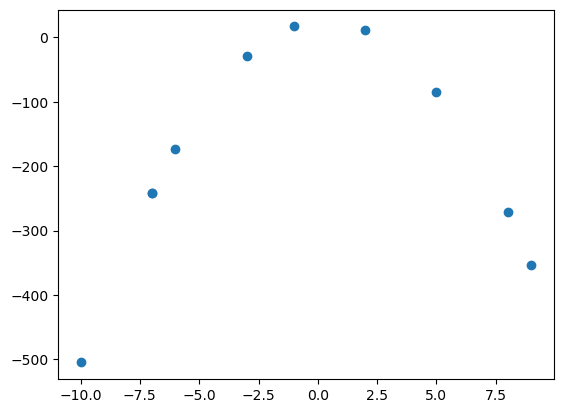

In [53]:
plt.scatter(x,y)

In [54]:
x_variable=torch.autograd.Variable(torch.from_numpy(x).float(),requires_grad=False)
#torch.from.numpy(x) x sayılarını torch a çevirdik int i ları floata çevirdik
y_variable=torch.autograd.Variable(torch.from_numpy(y).float(),requires_grad=False)


In [55]:
# a * x**2 + b*x + c  3 bilinmeyen

a= torch.rand((1,))
b= torch.rand((1,))
c= torch.rand((1,))

a_variable=torch.autograd.Variable(a,requires_grad=True)
b_variable=torch.autograd.Variable(a,requires_grad=True)
c_variable=torch.autograd.Variable(a,requires_grad=True)


In [56]:
optimizer= torch.optim.Adam([a_variable,b_variable,c_variable],lr=1)

In [57]:
loss_fn=torch.nn.MSELoss()

In [58]:
update=0
max_update=100


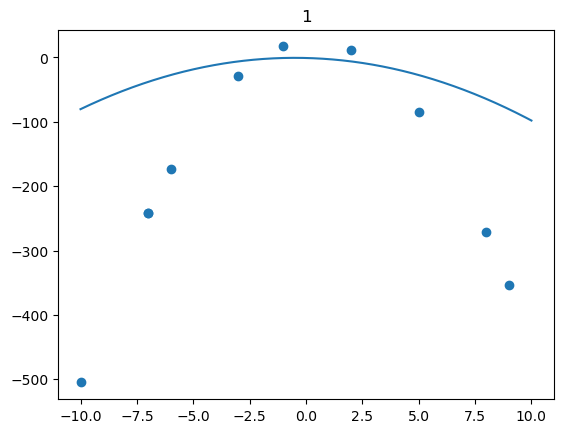

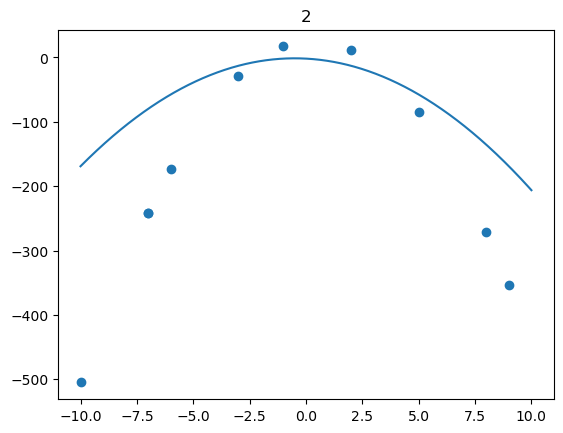

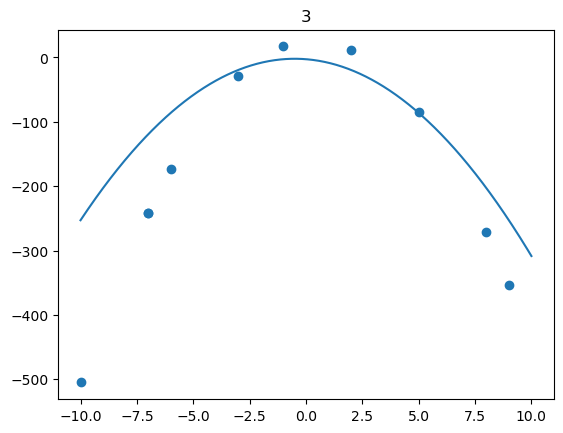

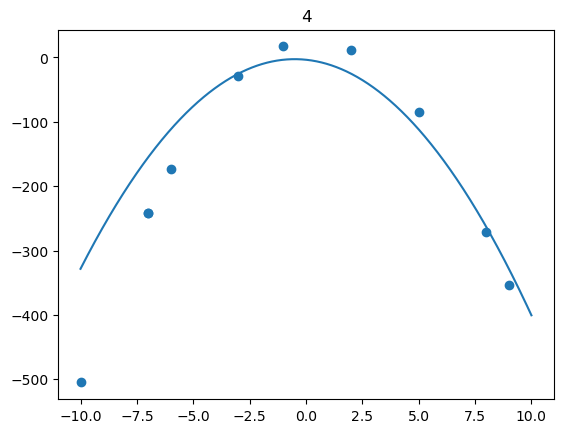

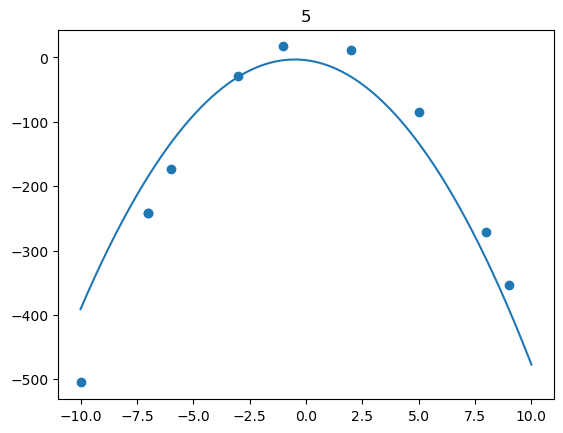

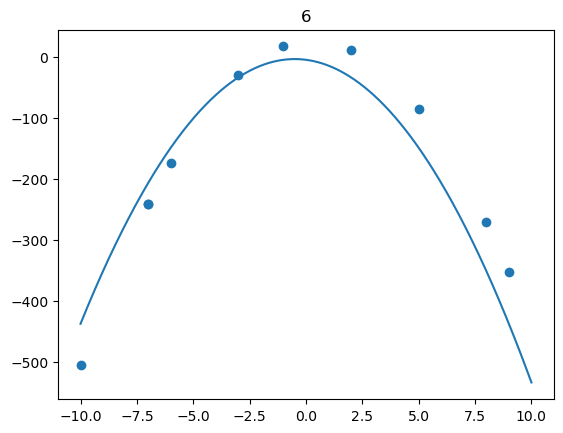

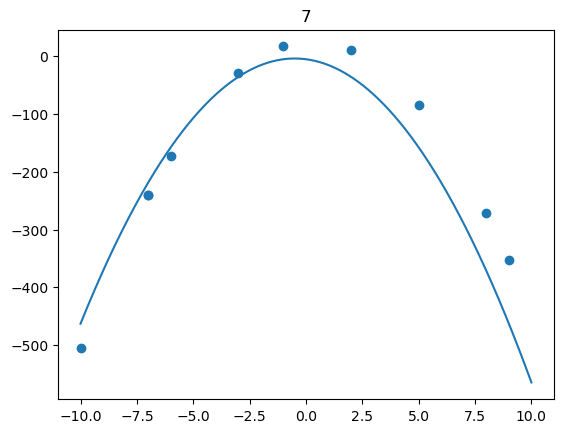

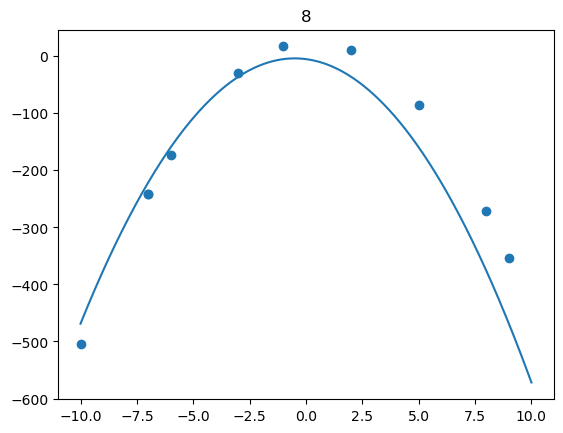

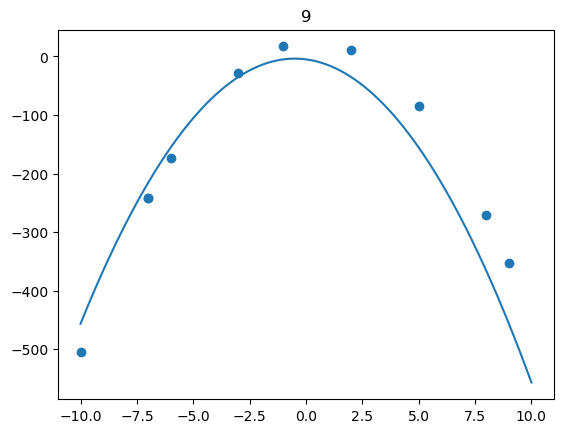

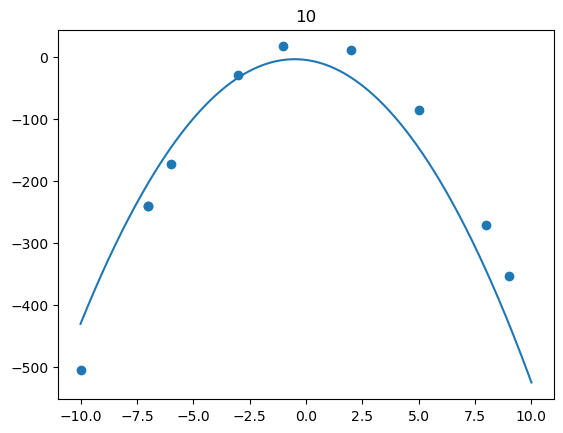

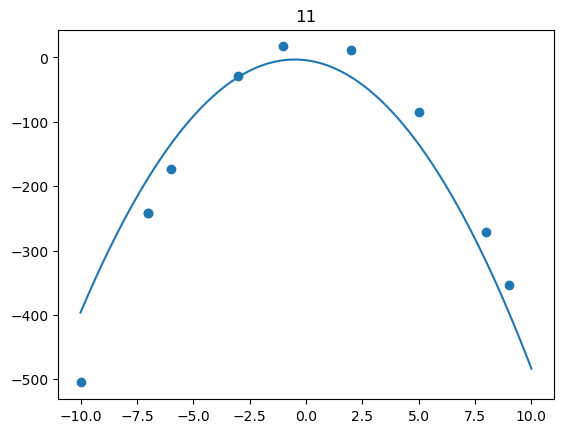

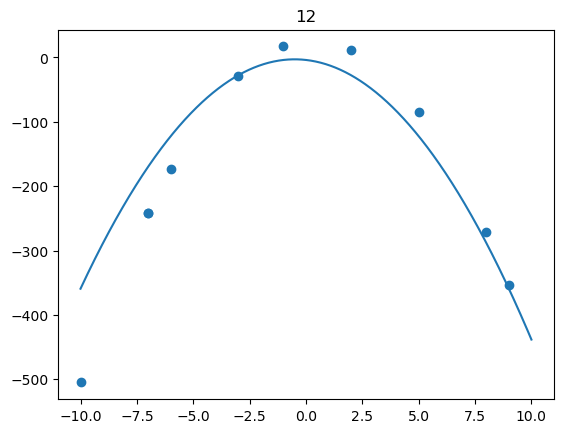

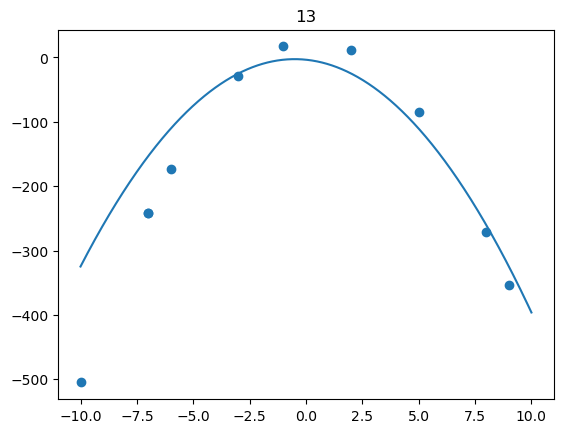

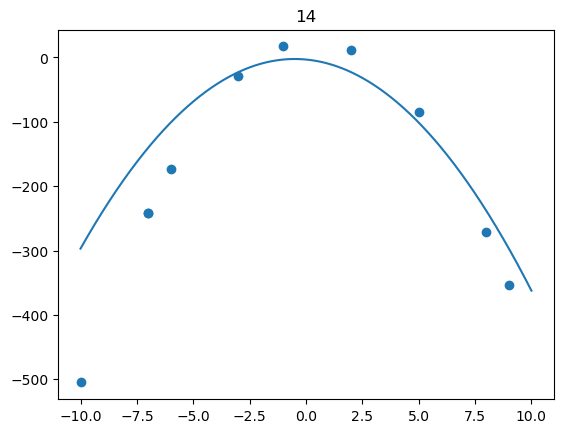

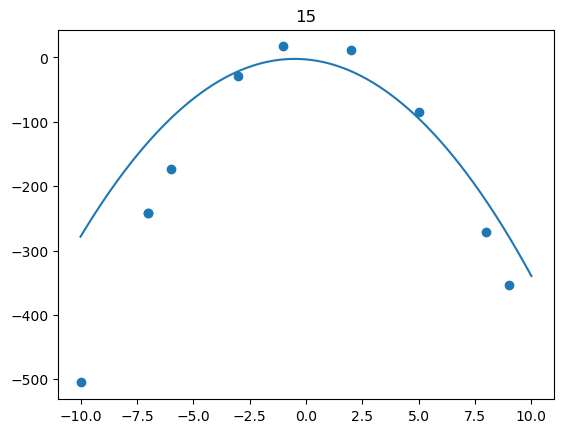

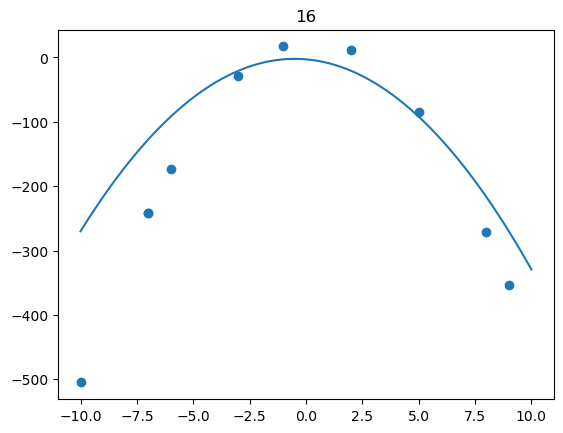

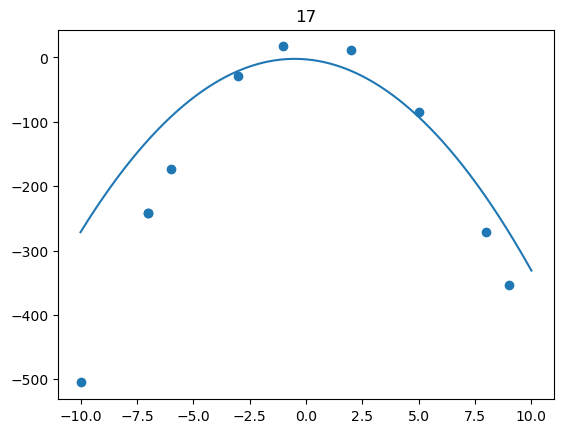

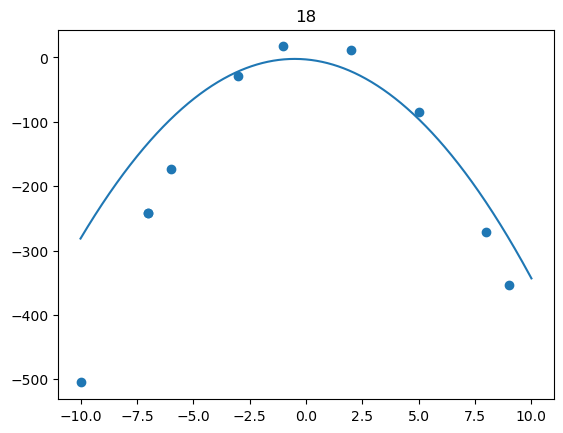

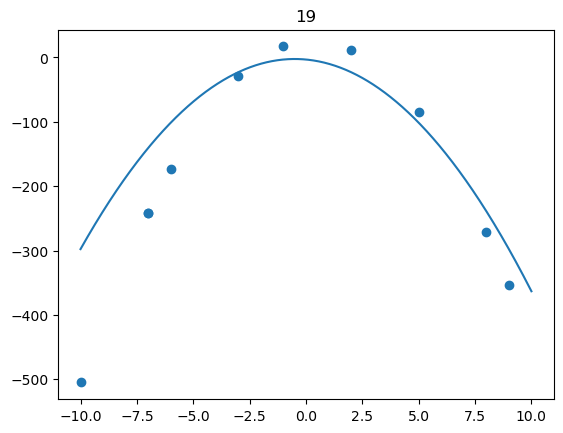

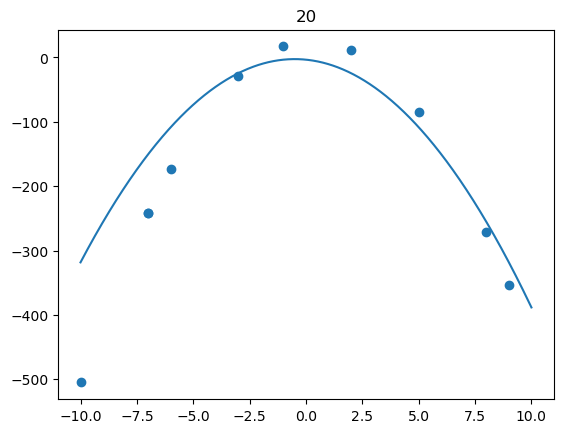

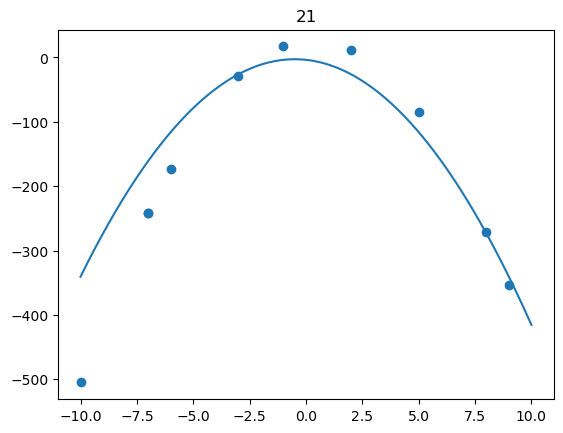

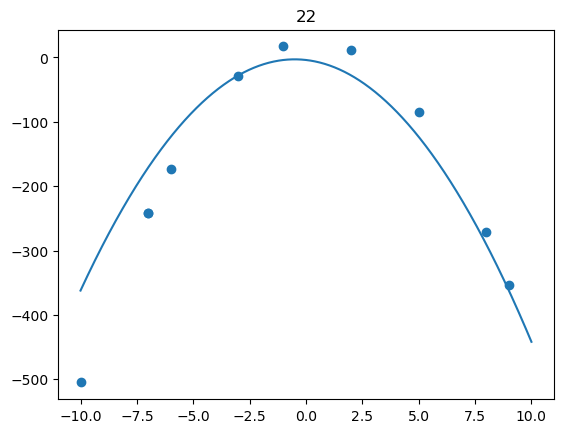

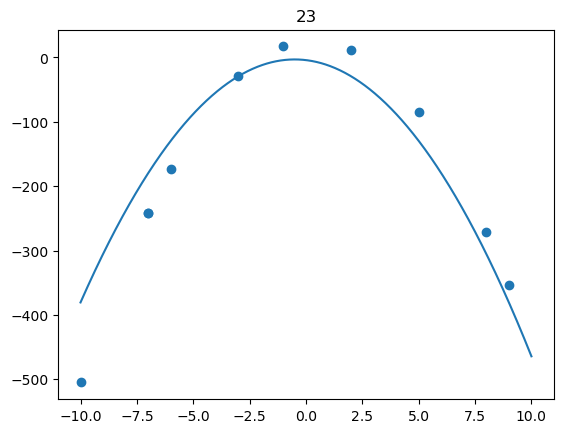

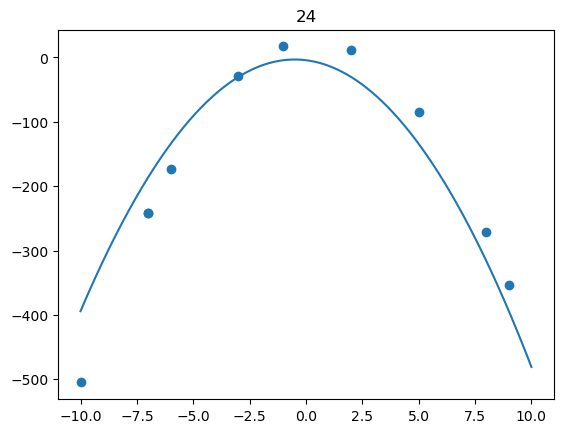

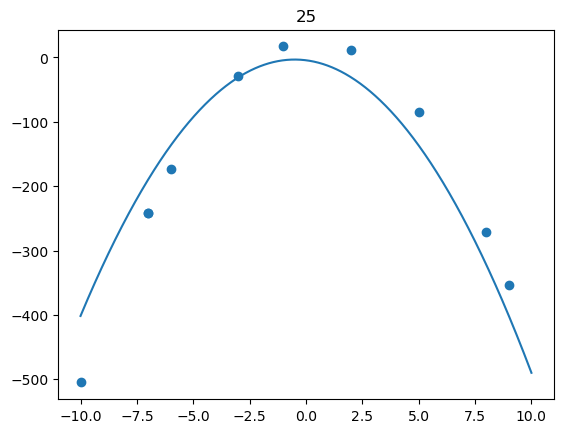

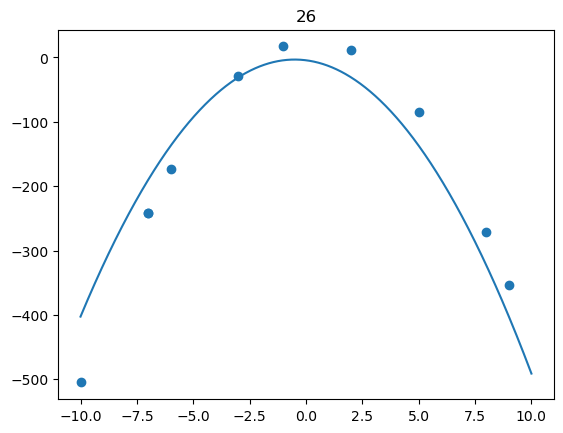

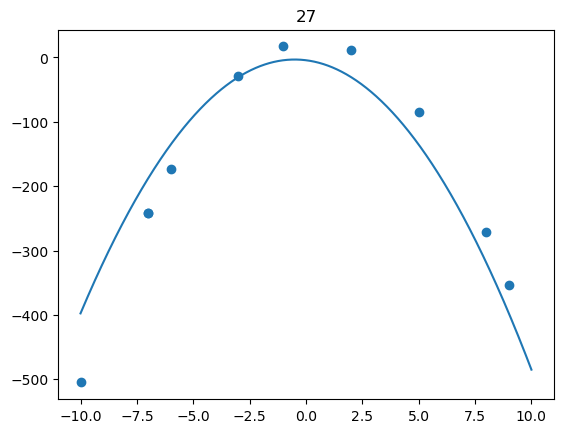

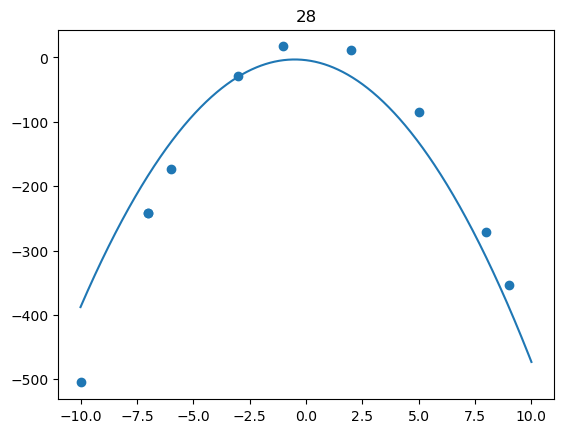

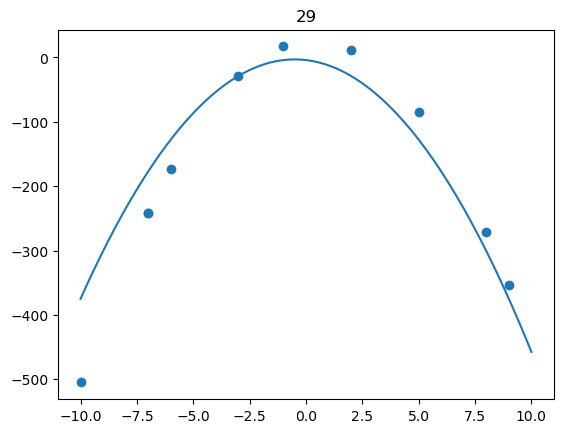

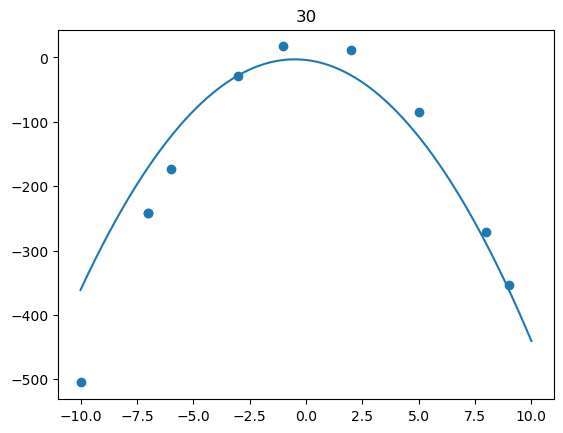

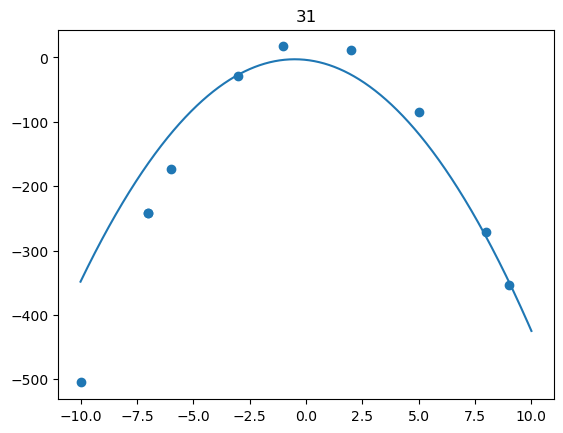

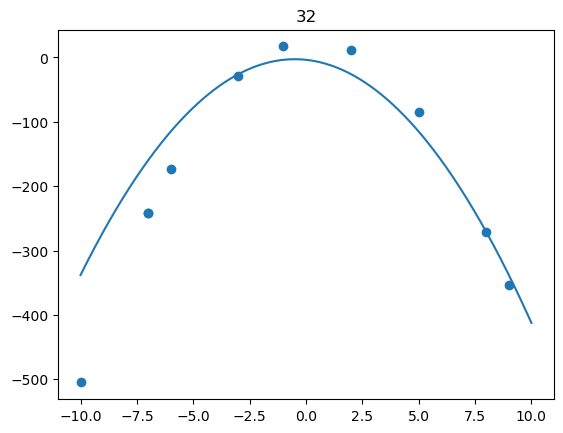

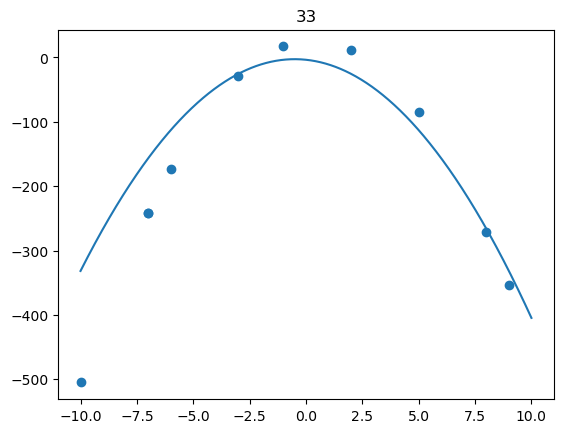

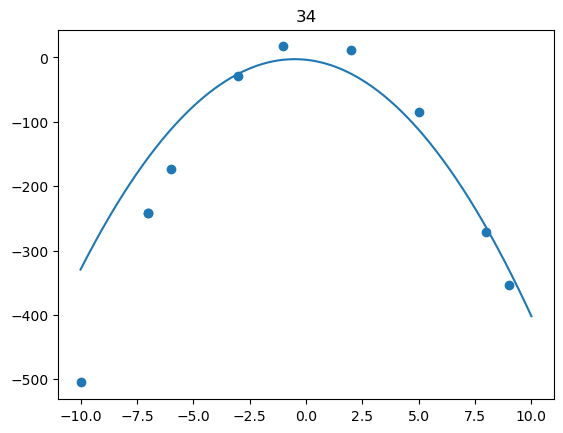

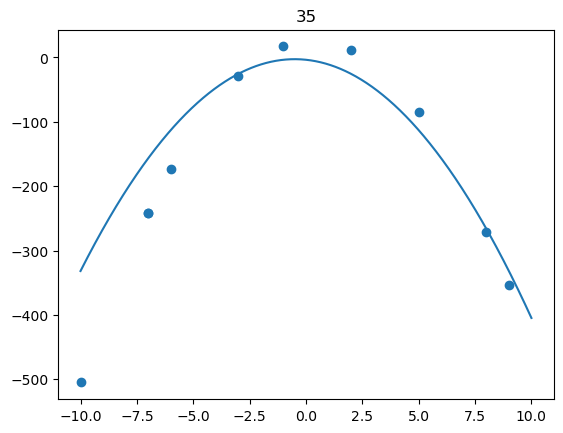

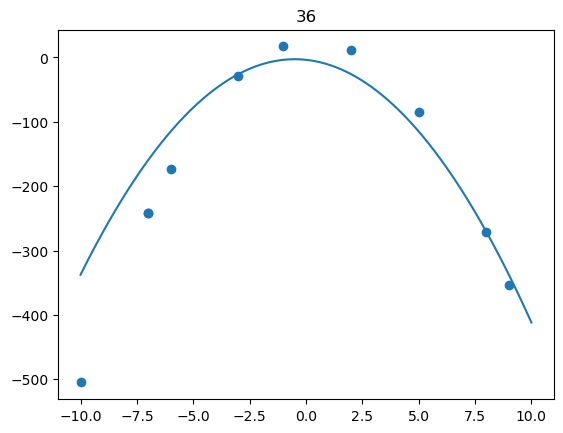

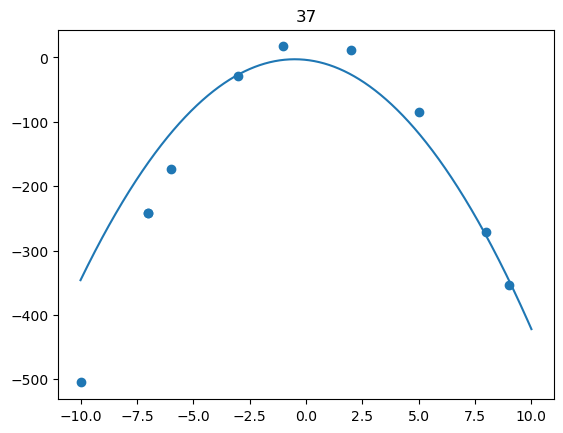

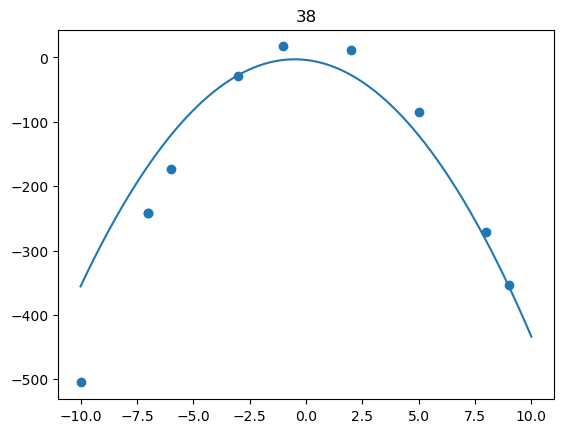

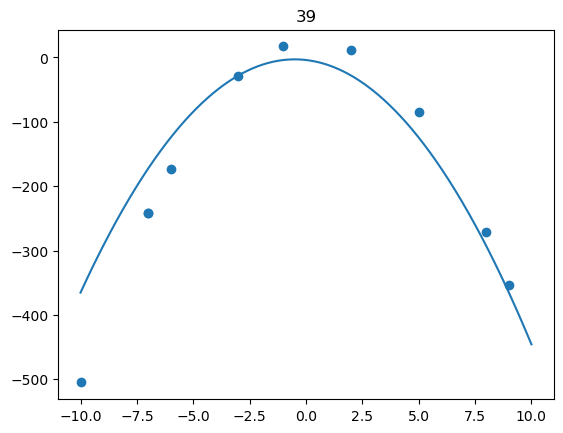

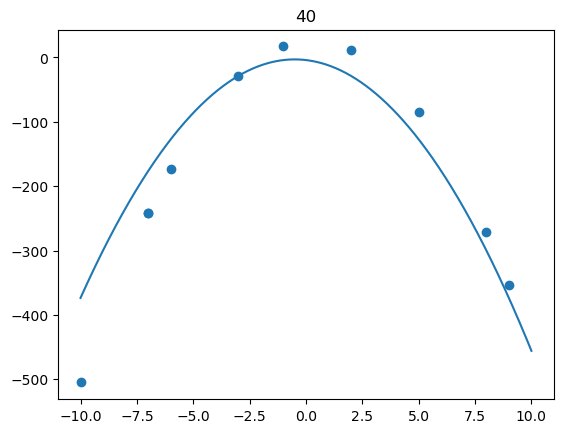

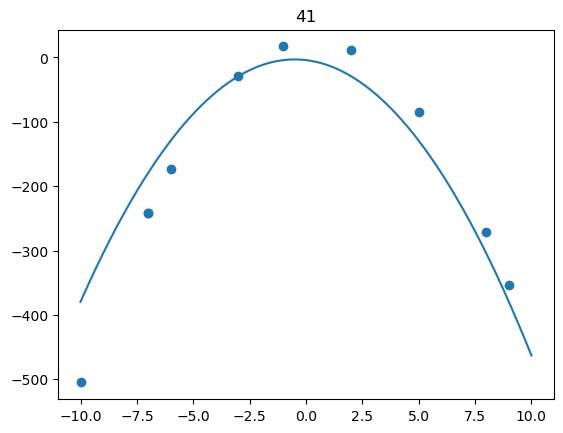

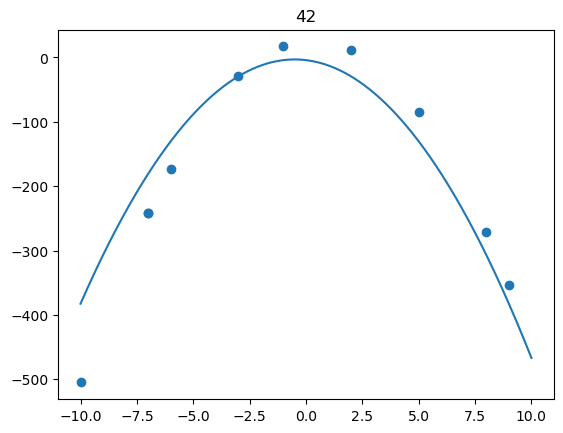

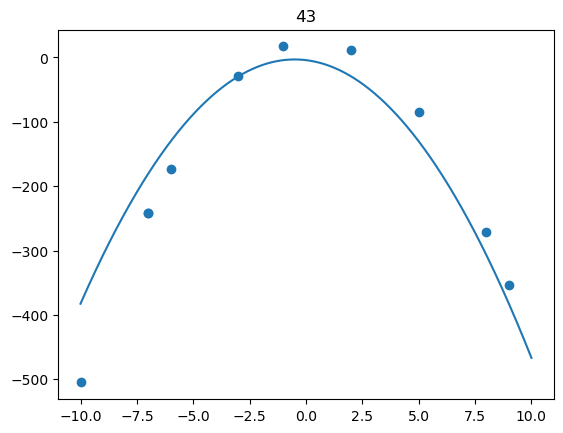

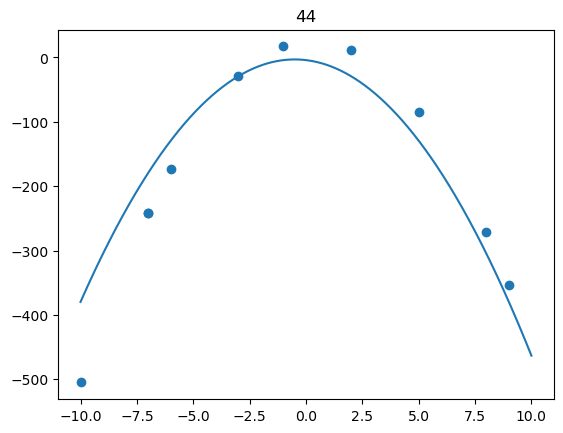

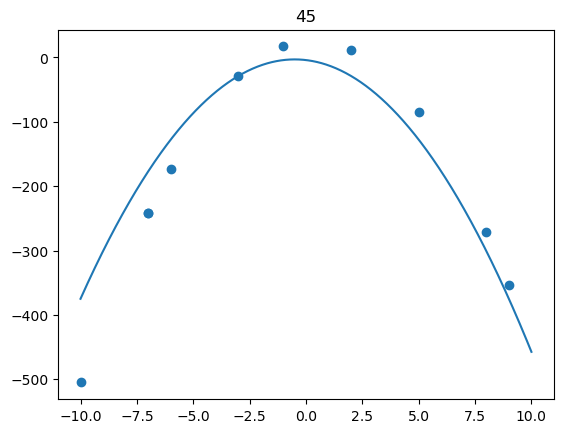

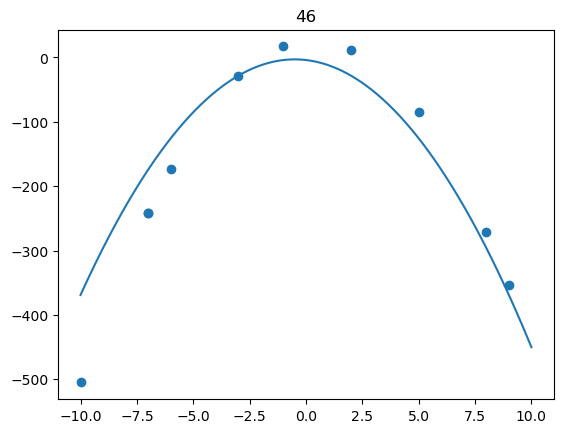

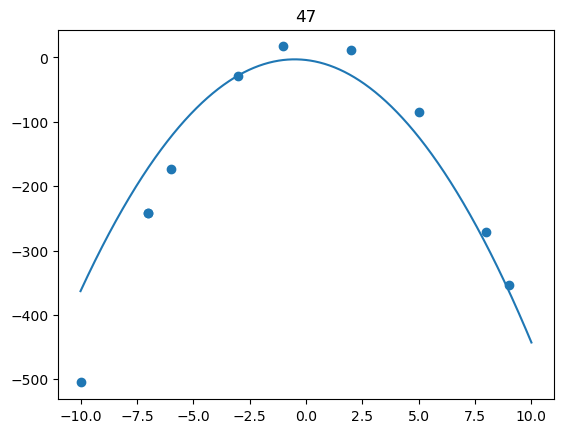

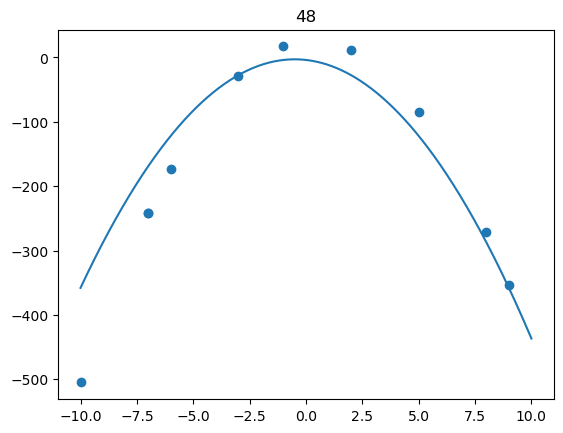

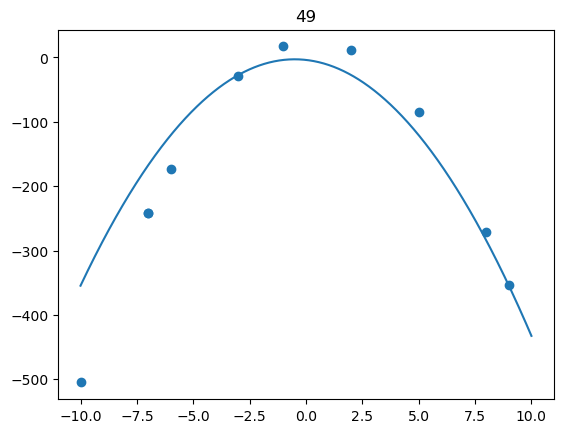

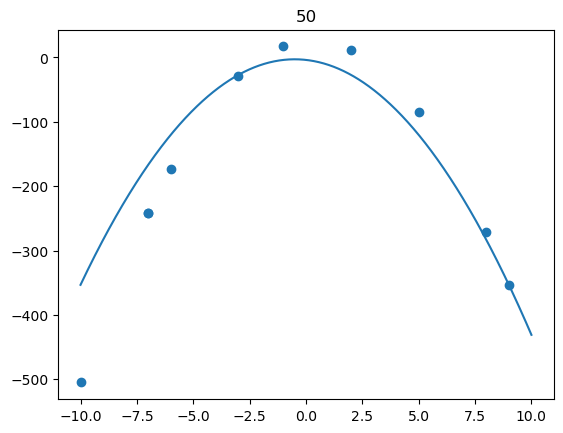

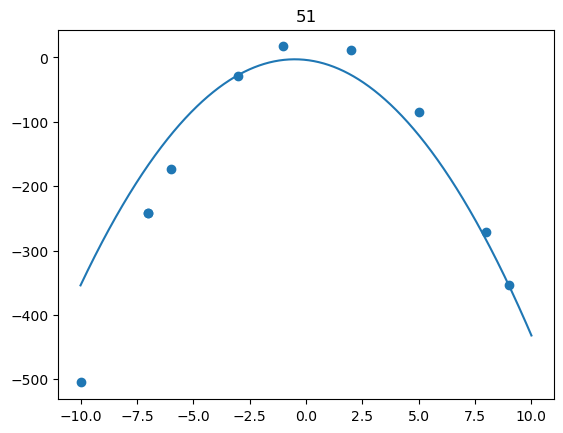

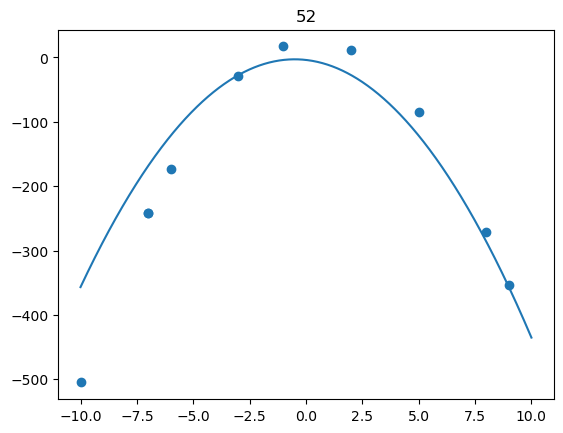

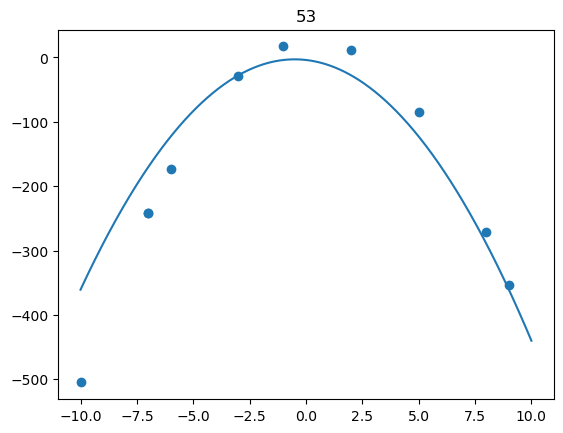

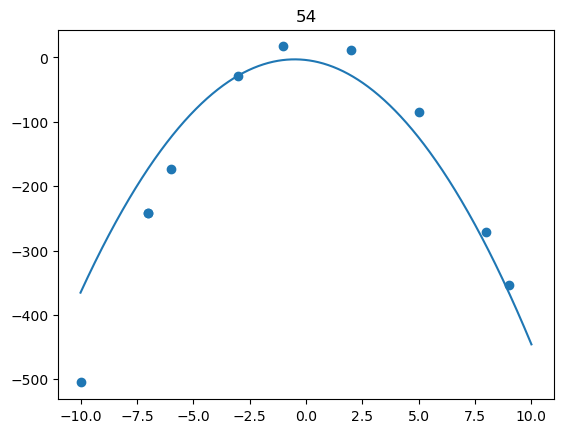

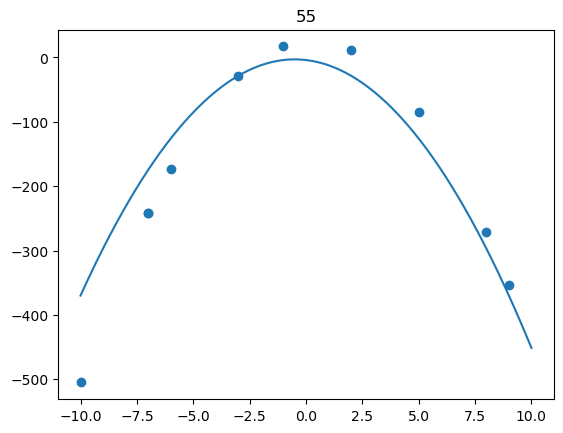

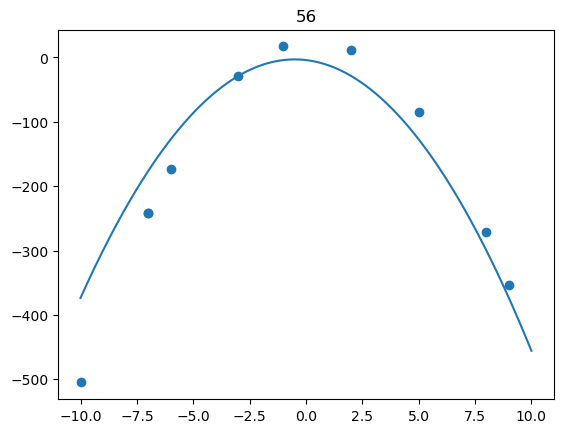

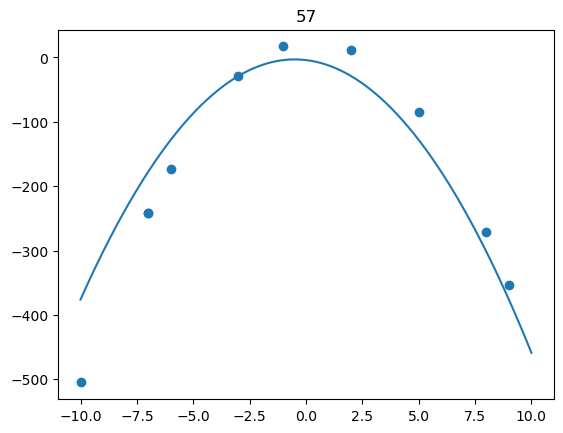

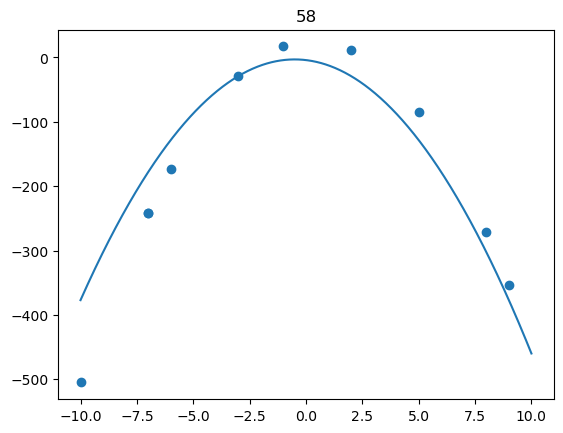

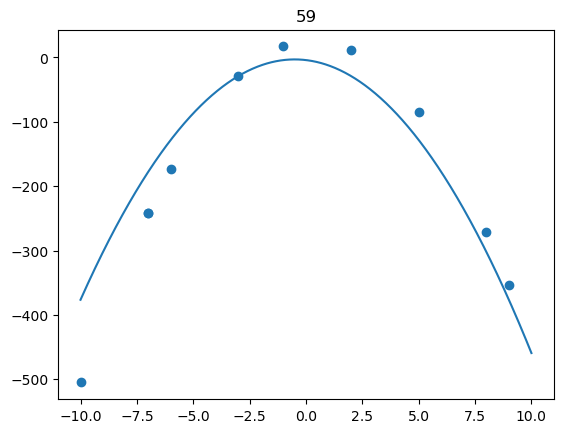

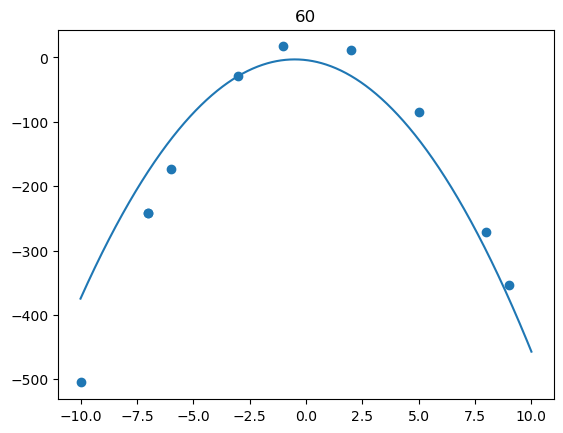

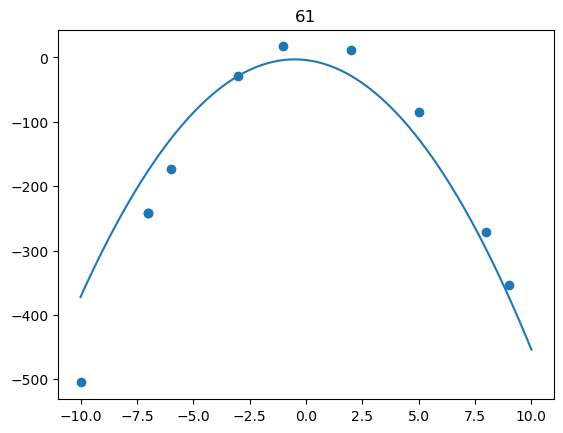

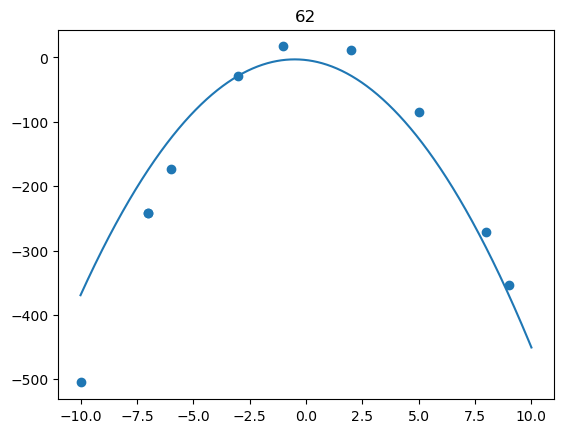

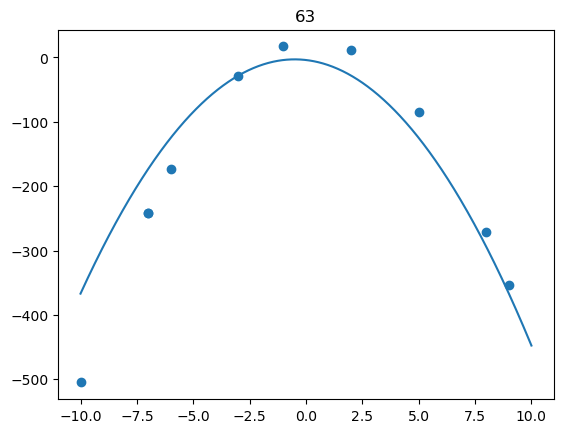

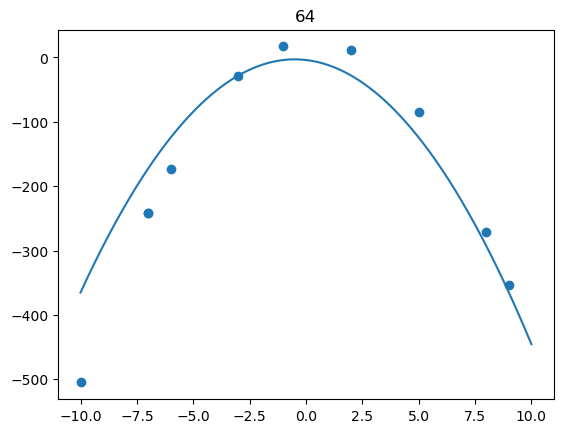

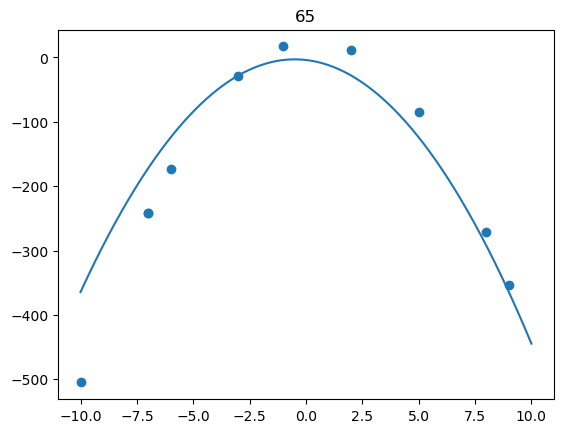

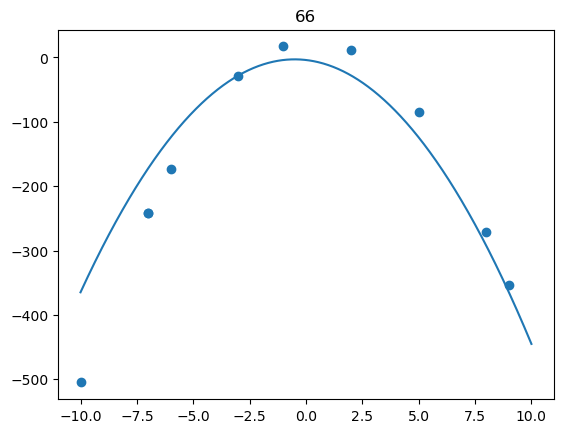

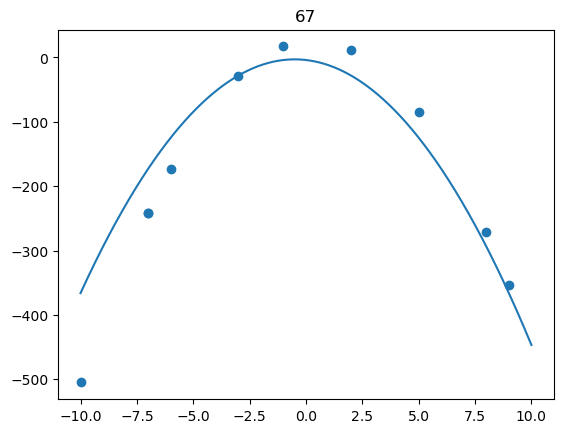

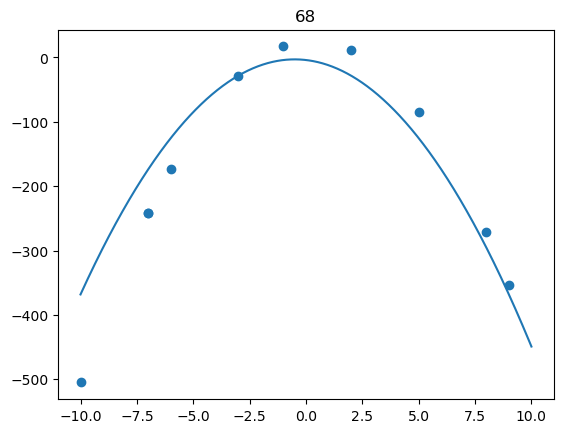

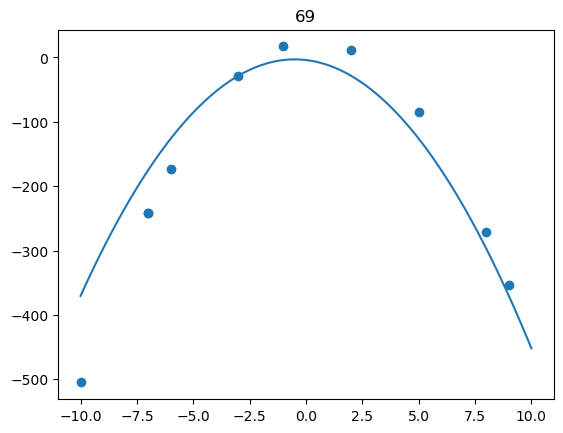

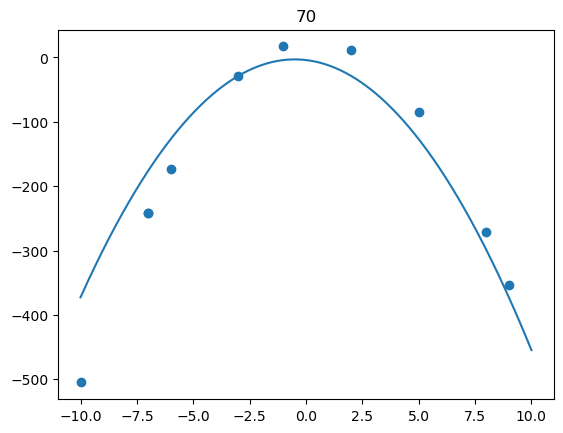

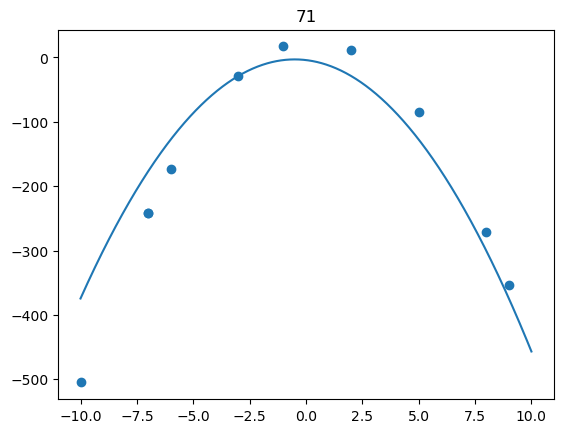

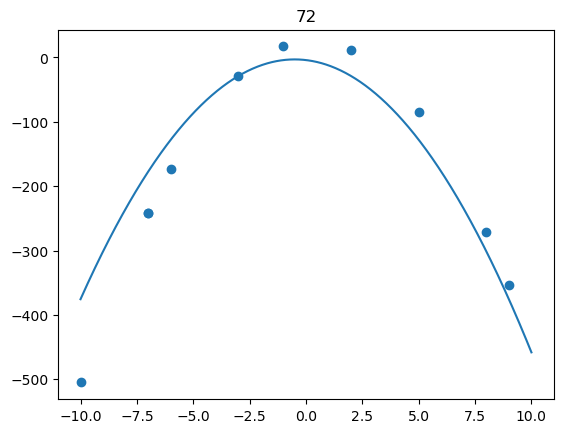

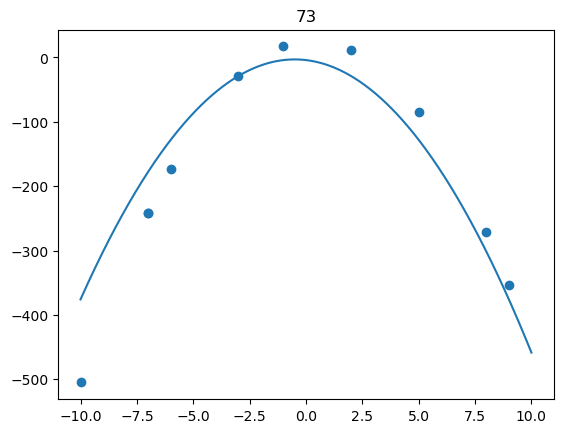

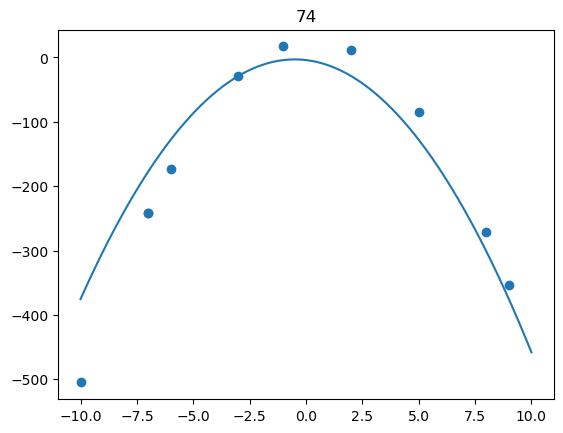

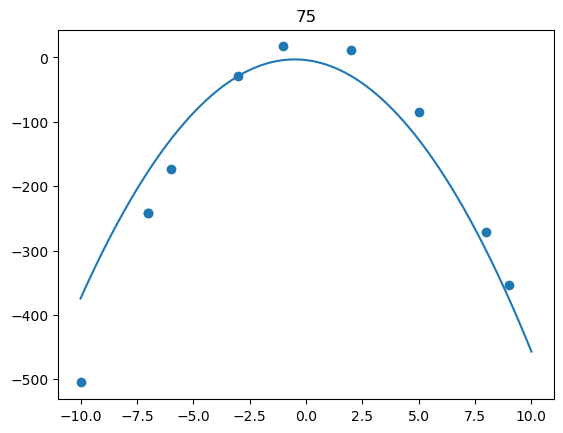

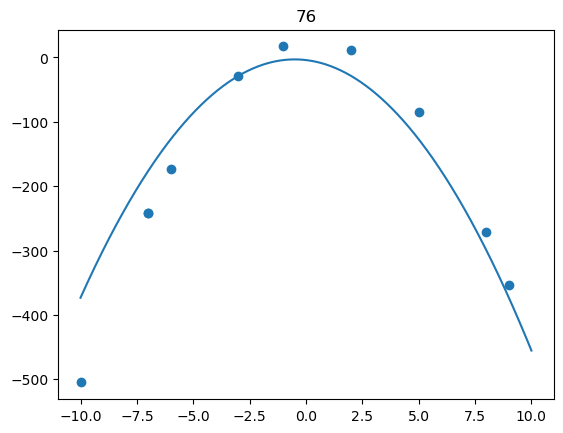

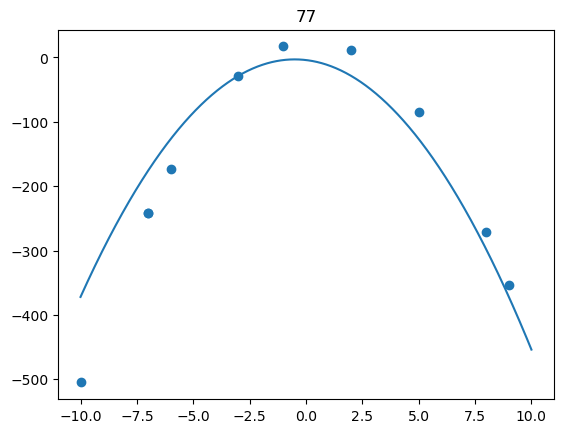

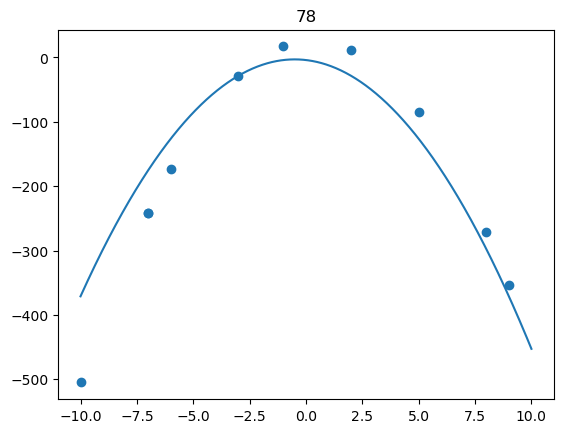

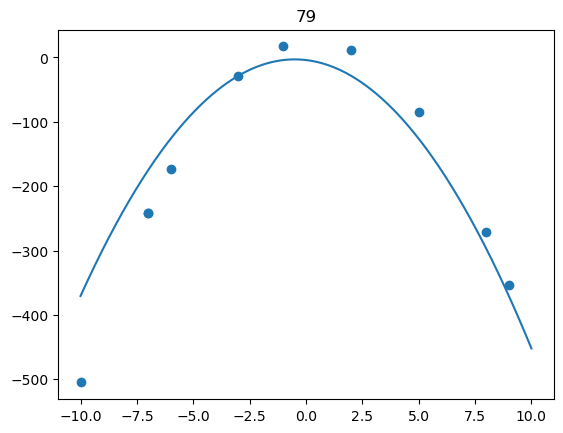

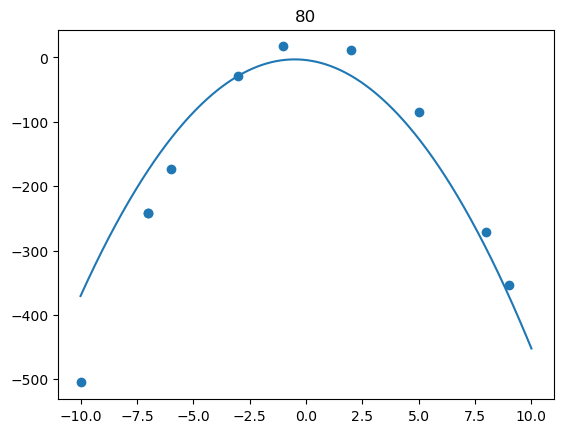

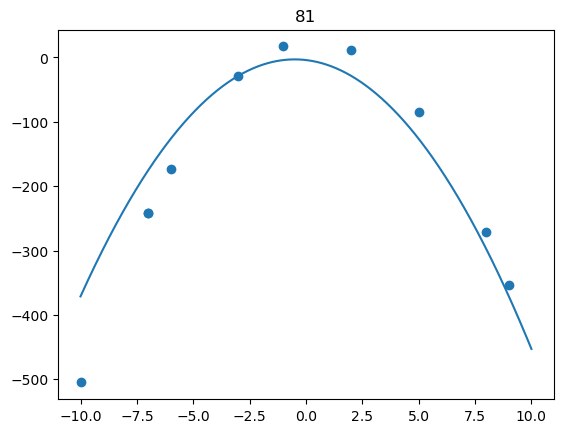

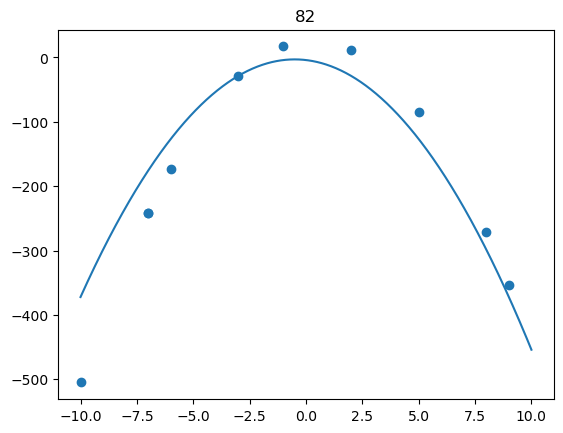

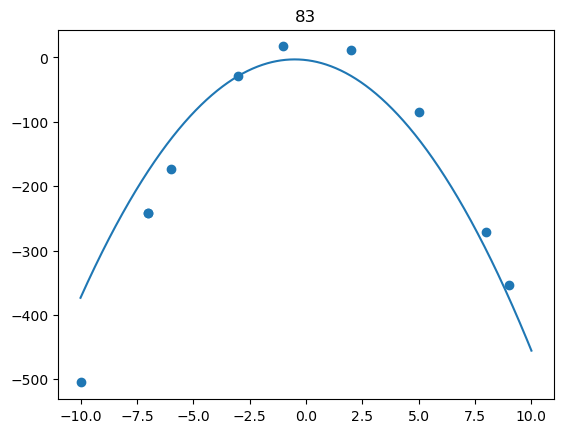

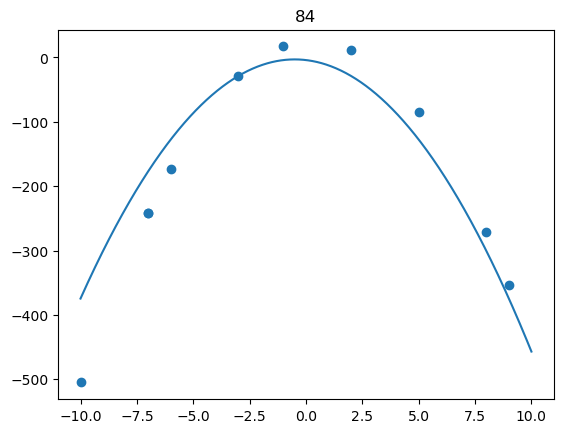

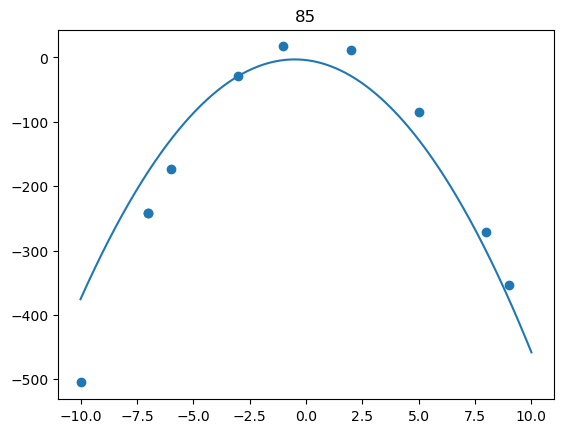

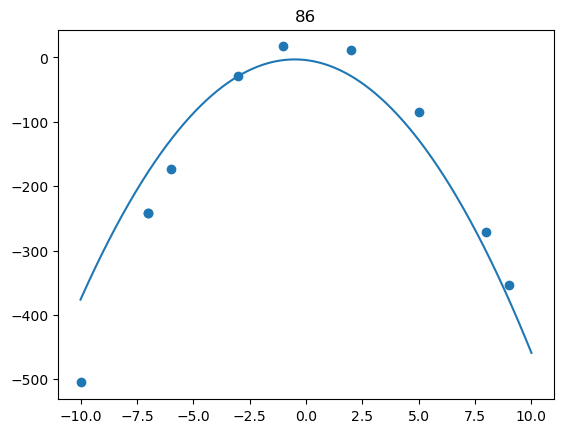

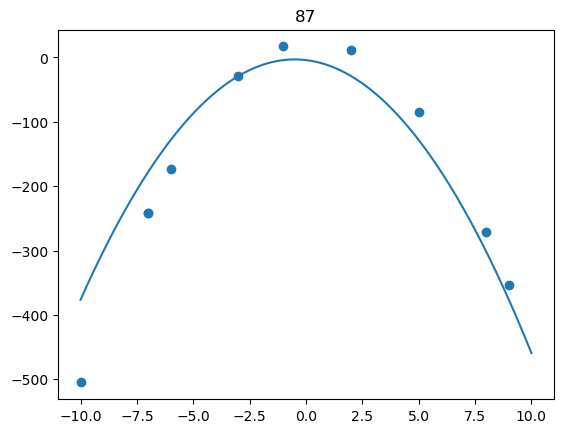

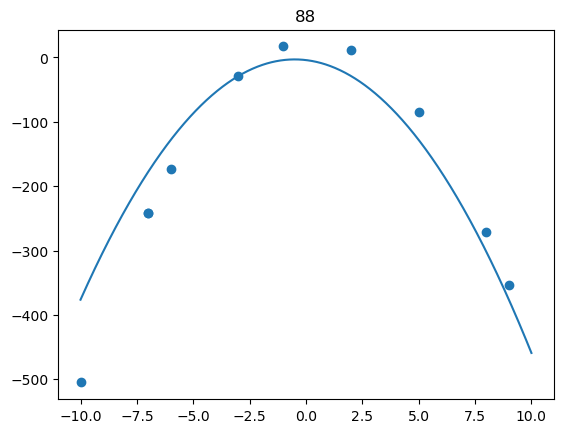

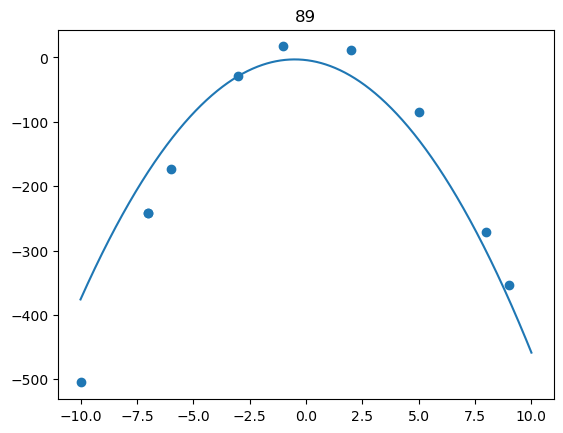

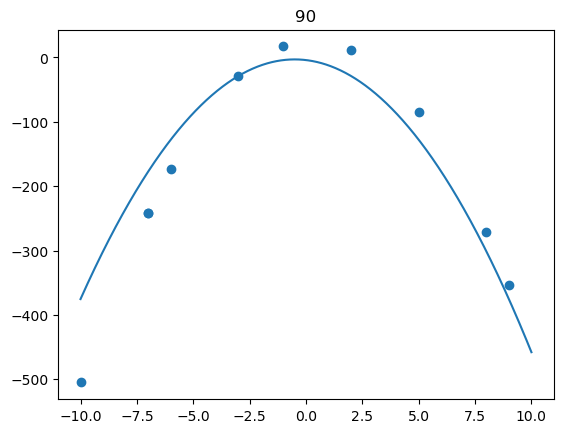

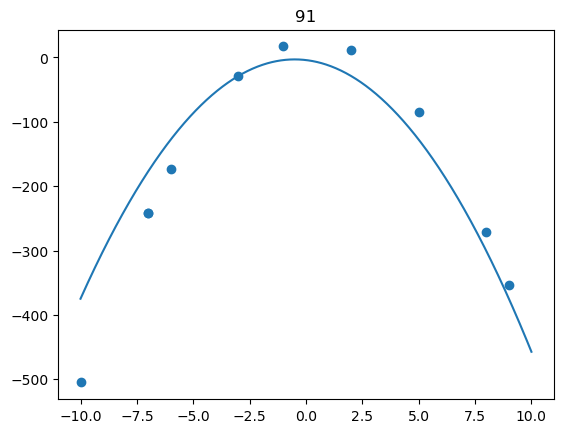

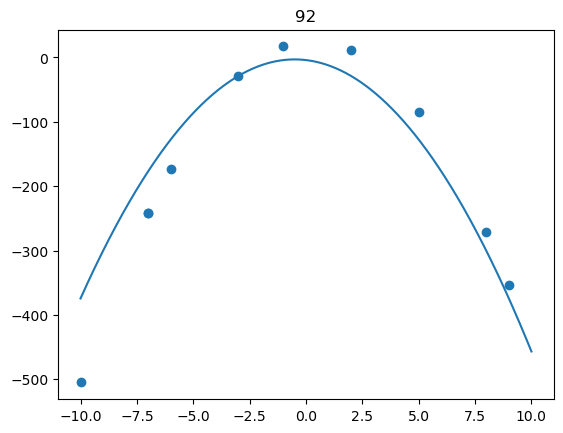

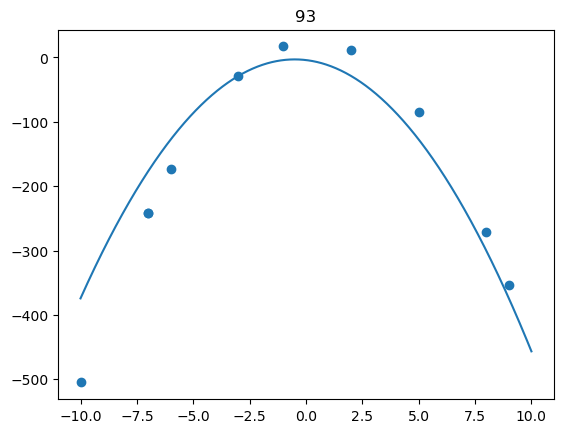

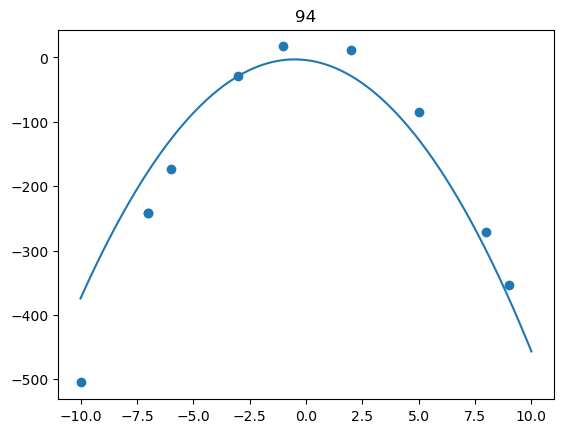

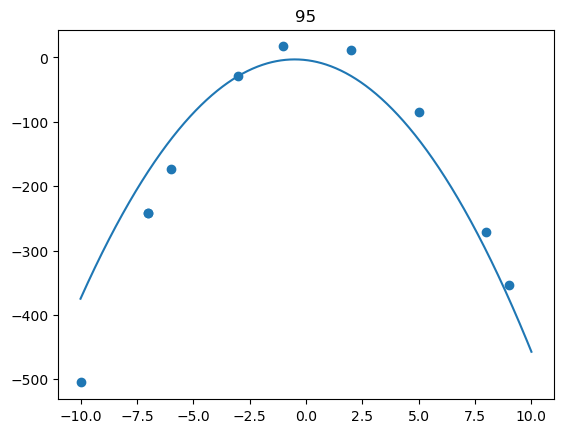

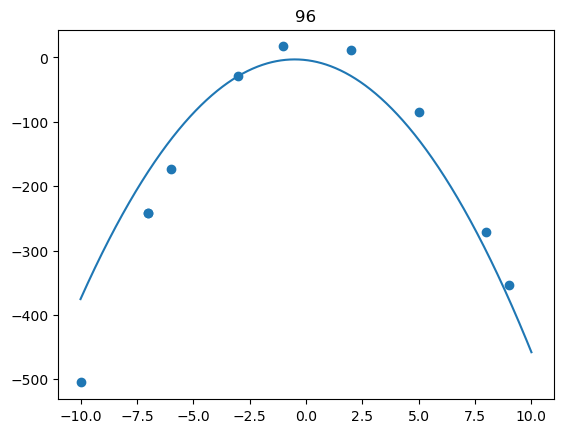

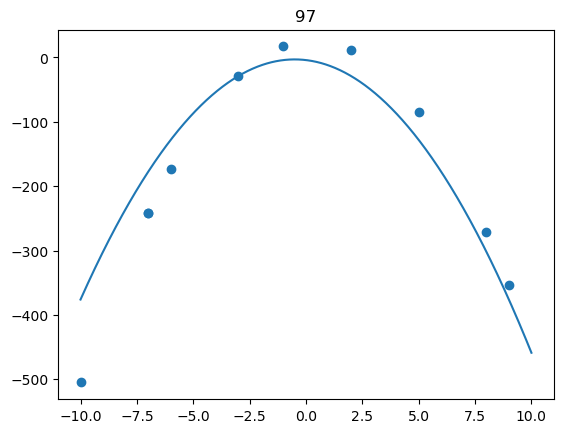

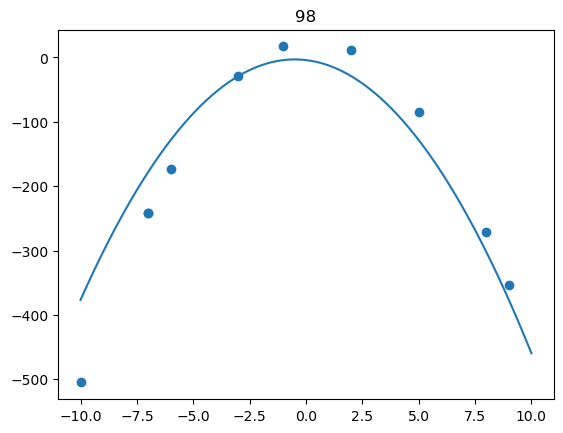

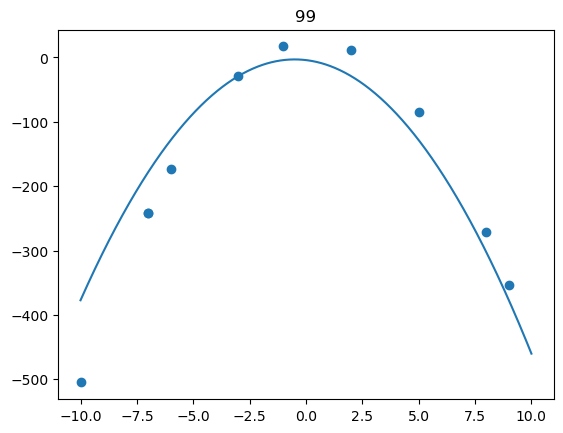

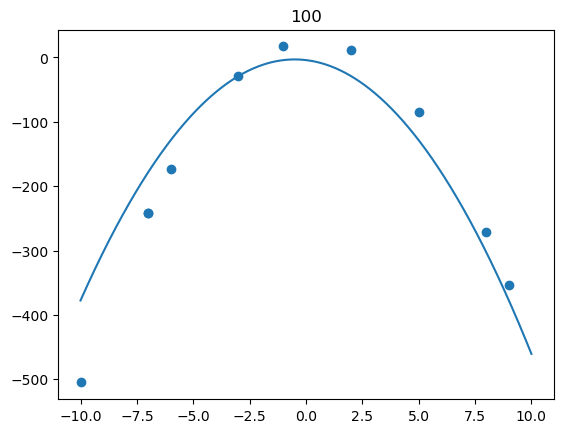

In [59]:
while update<max_update:
    
    optimizer.zero_grad()
    
    y_hat_variable=a_variable*x_variable**2+b_variable*x_variable+c_variable
    
    loss=loss_fn(y_variable,y_hat_variable)
    
    loss.backward()
    
    optimizer.step()
    
    update=update+1
    
    plt.clf()
    
    plt.scatter(x,y)
    x_=np.linspace(-10,10,1000)
    y_hat=a_variable.detach().numpy()*x_**2 + b_variable.detach().numpy()*x_+c_variable.detach().numpy()
    
    plt.plot(x_,y_hat)
    plt.title(update)
    plt.show()  
    
    